In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.utils import connection

In [16]:
conn = connection()

In [17]:
df_dividends = pd.read_sql("SELECT * FROM moex_iss_dividends", conn)

In [18]:
df_dividends.head(5)

,ticker,date,dividedends_rub_per_share,updated_date
0,SBER,2019-06-13,16.0,2025-11-13
1,SBER,2020-10-05,18.7,2025-11-13
2,SBER,2021-05-12,18.7,2025-11-13
3,SBER,2023-05-11,25.0,2025-11-13
4,SBER,2024-07-11,33.3,2025-11-13


In [31]:
df_dividends.shape

(668, 4)

In [32]:
df_dividends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ticker                     668 non-null    object 
 1   date                       668 non-null    object 
 2   dividedends_rub_per_share  668 non-null    float64
 3   updated_date               668 non-null    object 
dtypes: float64(1), object(3)
memory usage: 21.0+ KB


In [41]:
df_dividends['date'] = pd.to_datetime(df_dividends['date'], errors='coerce', infer_datetime_format=True)

/var/folders/3y/q4zxlyrs3md__fhhs8mw34qc0000gn/T/ipykernel_5060/1684796553.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_dividends['date'] = pd.to_datetime(df_dividends['date'], errors='coerce', infer_datetime_format=True)


In [33]:
df_dividends.describe()

,dividedends_rub_per_share
count,668.000000
mean,77.571348
std,188.345601
min,0.000000
25%,1.627250
50%,11.815000
75%,43.850000
max,1523.170000


In [34]:
df_dividends.isnull().sum()

ticker                       0
date                         0
dividedends_rub_per_share    0
updated_date                 0
dtype: int64

In [ ]:
df_dividends.nunique()

ticker                        66
date                         510
dividedends_rub_per_share    535
updated_date                   1
dtype: int64

In [61]:
df_dividends.ticker.unique()

array(['SBER', 'GAZP', 'T', 'X5', 'PIKK', 'PLZL', 'LKOH', 'GMKN', 'VTBR',
       'NVTK', 'YDEX', 'TATN', 'SMLT', 'ROSN', 'AFLT', 'IRAO', 'CHMF',
       'NLMK', 'MAGN', 'MGNT', 'MTLR', 'AFKS', 'MOEX', 'POSI', 'ALRS',
       'BELU', 'MTSS', 'SVCB', 'SNGS', 'HEAD', 'PHOR', 'RTKM', 'SIBN',
       'UGLD', 'RUAL', 'HYDR', 'BSPB', 'FEES', 'EUTR', 'RNFT', 'MRKC',
       'MDMG', 'FLOT', 'UPRO', 'ASTR', 'IVAT', 'WUSH', 'TRMK', 'MVID',
       'RASP', 'MRKP', 'SVAV', 'AQUA', 'RENI', 'SOFL', 'SGZH', 'SFIN',
       'OZPH', 'NMTP', 'OGKB', 'SELG', 'LEAS', 'CBOM', 'VSMO', 'IRKT',
       'VSEH'], dtype=object)

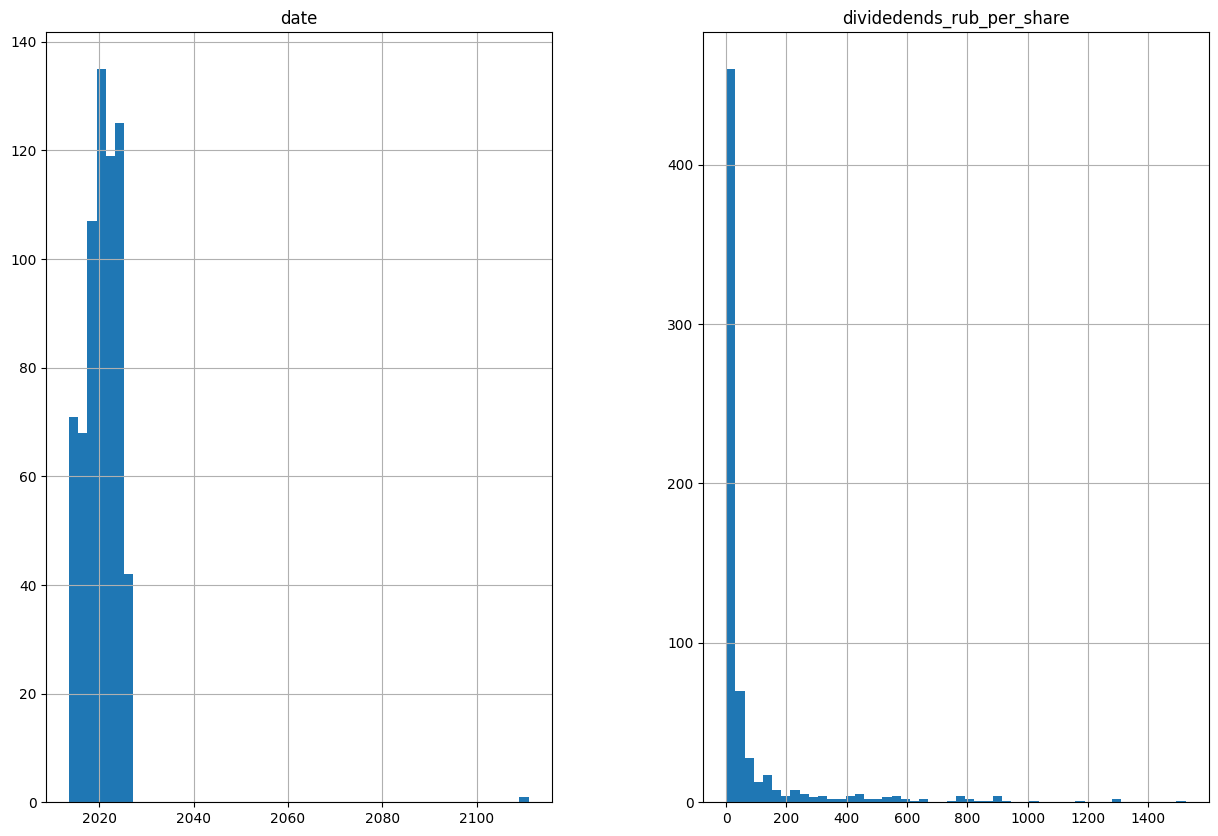

In [47]:
df_dividends.hist(bins=50, figsize=(15,10))
plt.show()

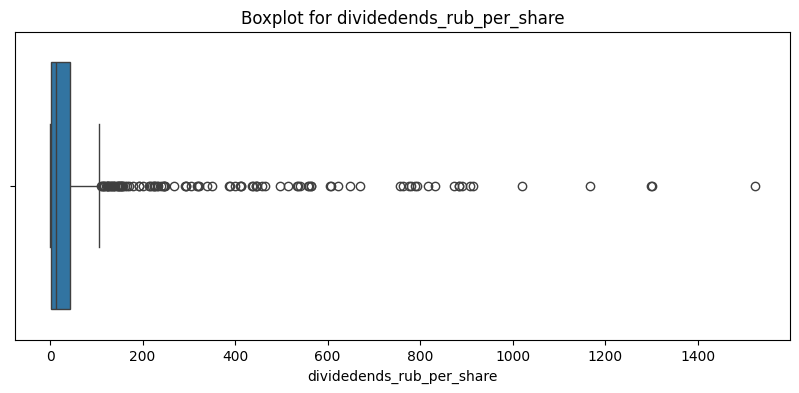

In [48]:
for col in df_dividends.select_dtypes(include="number").columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df_dividends[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

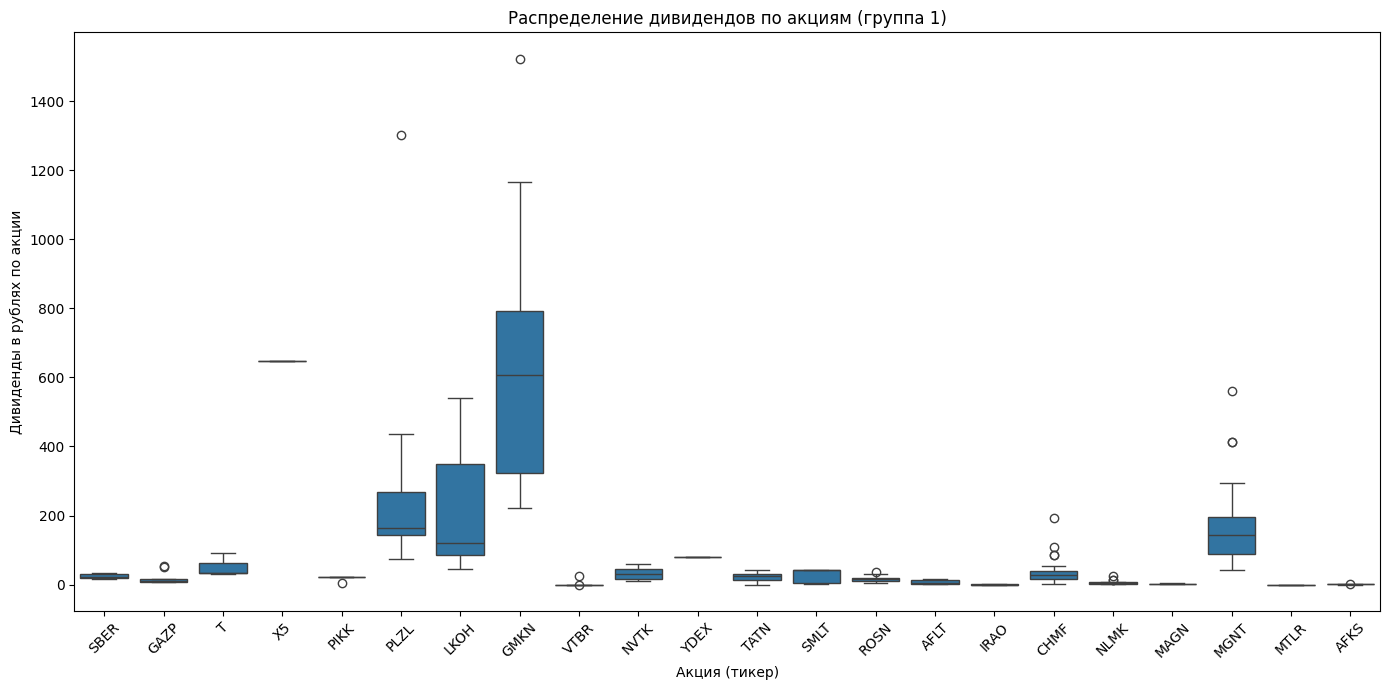

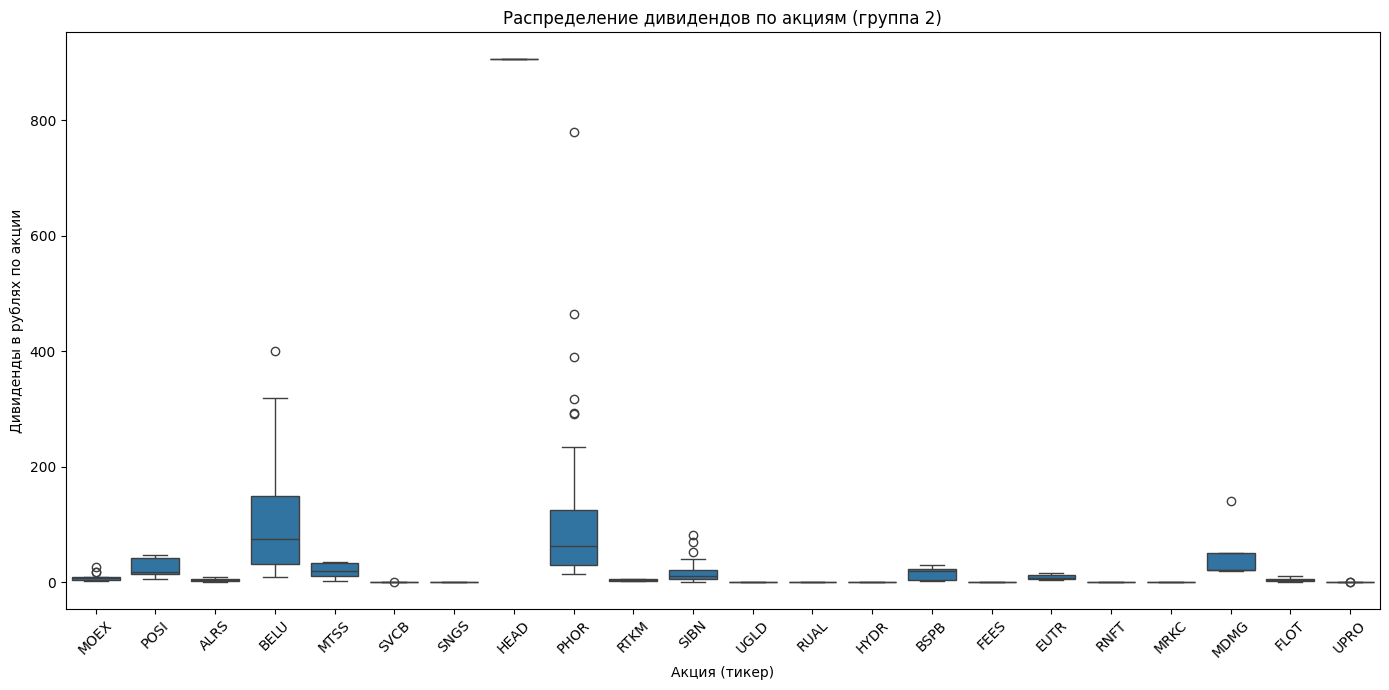

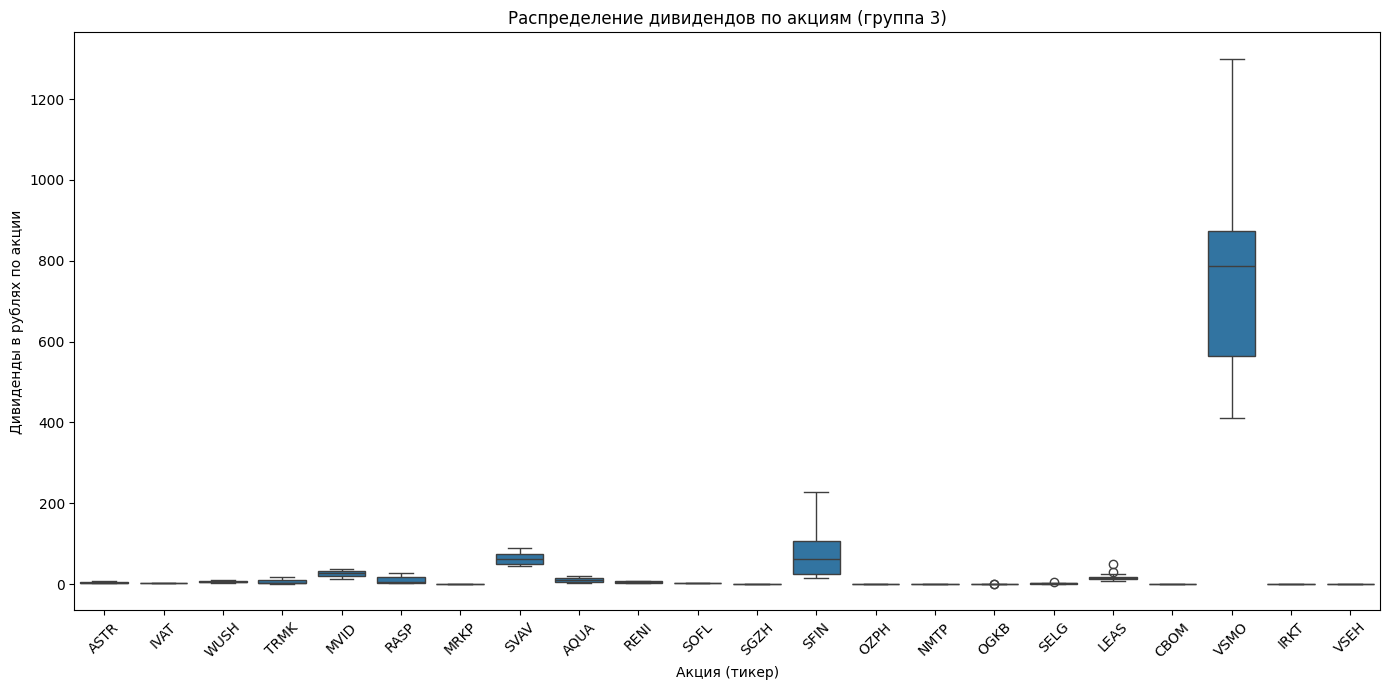

In [60]:
tickers = df_dividends['ticker'].unique()
groups = np.array_split(tickers, 3)  # разбиваем все тикеры на 3 группы

for i, tickers_subset in enumerate(groups, 1):
    subset = df_dividends[df_dividends['ticker'].isin(tickers_subset)]
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='ticker', y='dividedends_rub_per_share', data=subset)
    plt.title(f'Распределение дивидендов по акциям (группа {i})')
    plt.xlabel('Акция (тикер)')
    plt.ylabel('Дивиденды в рублях по акции')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

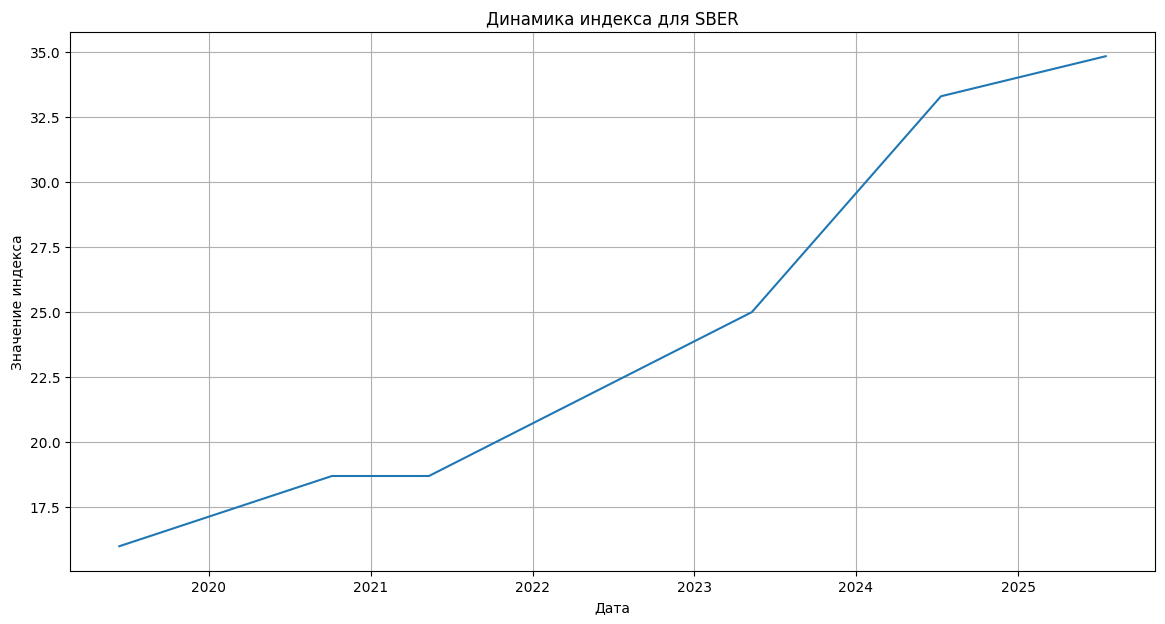

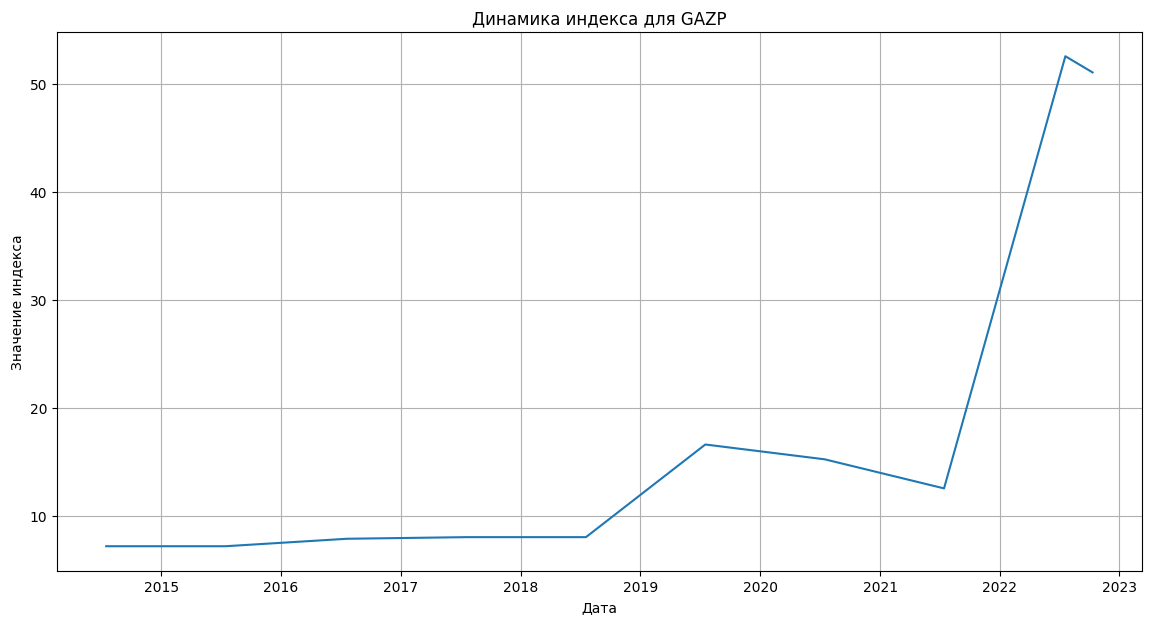

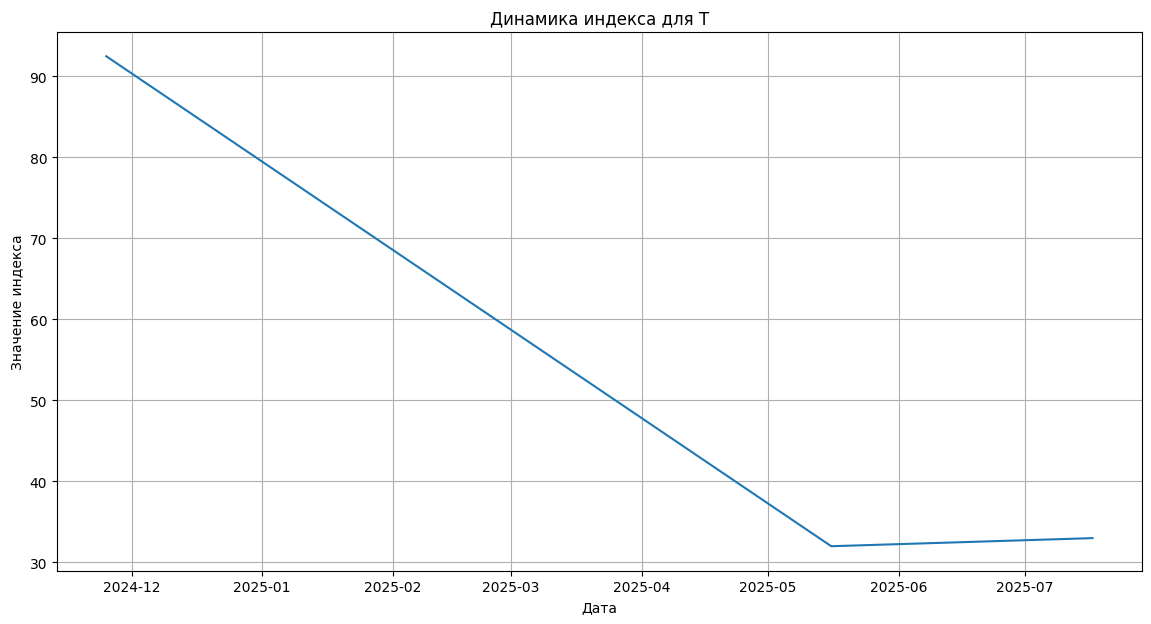

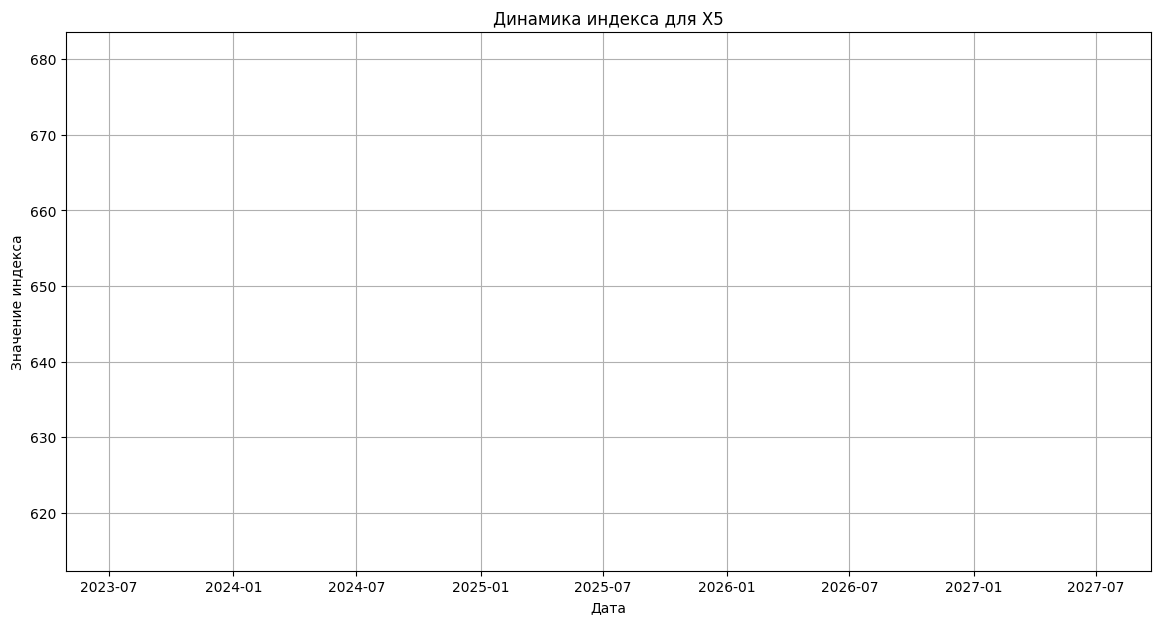

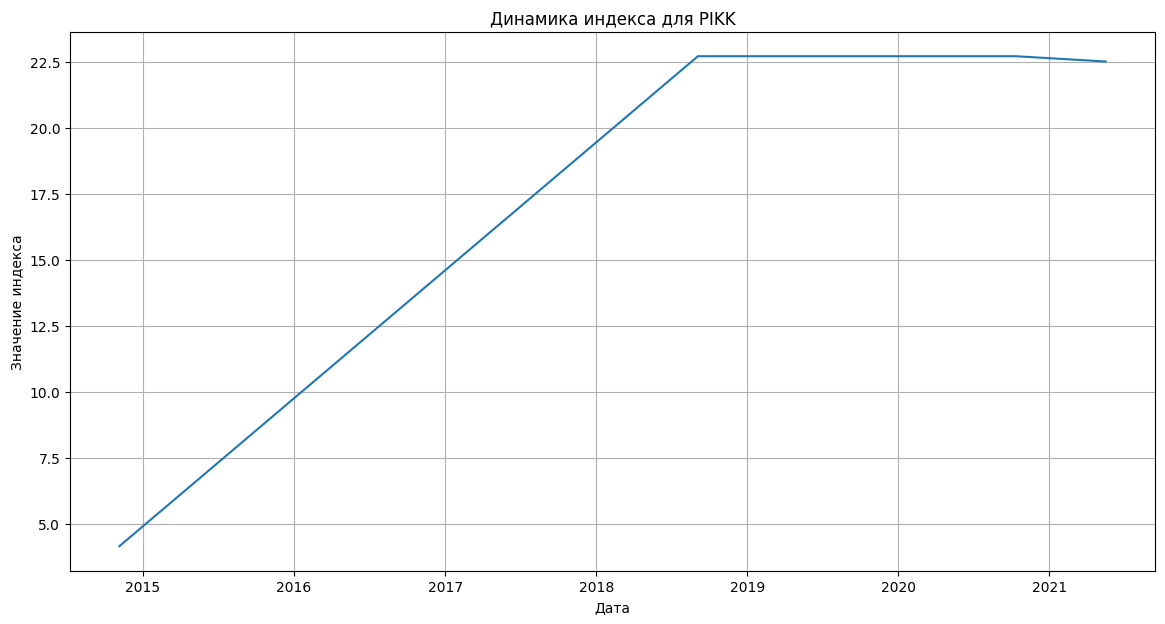

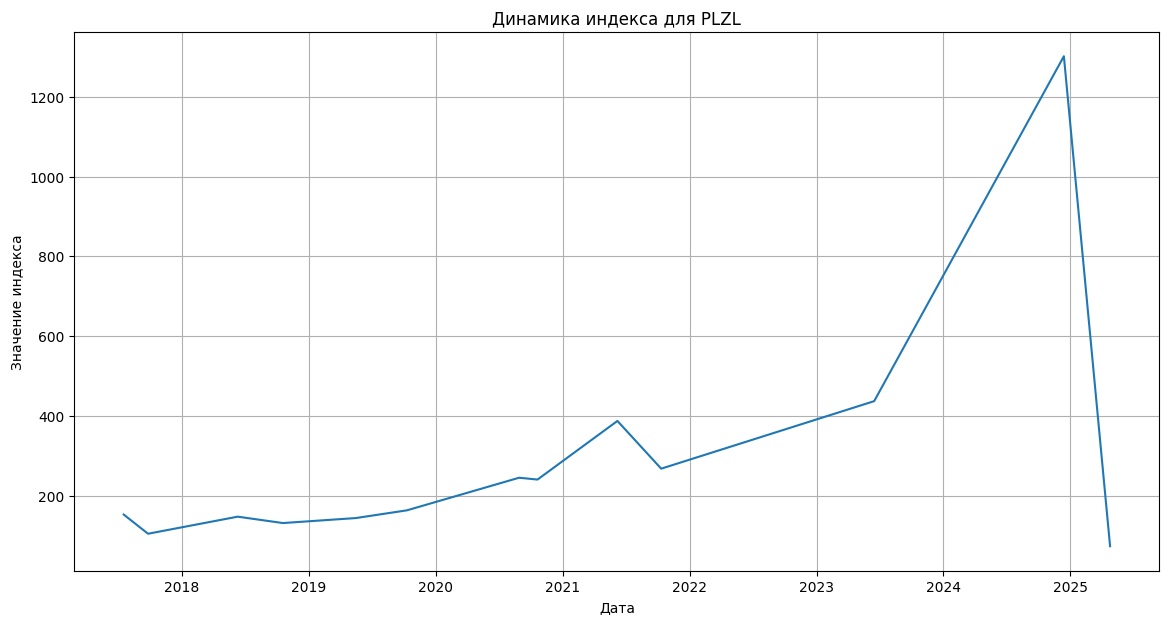

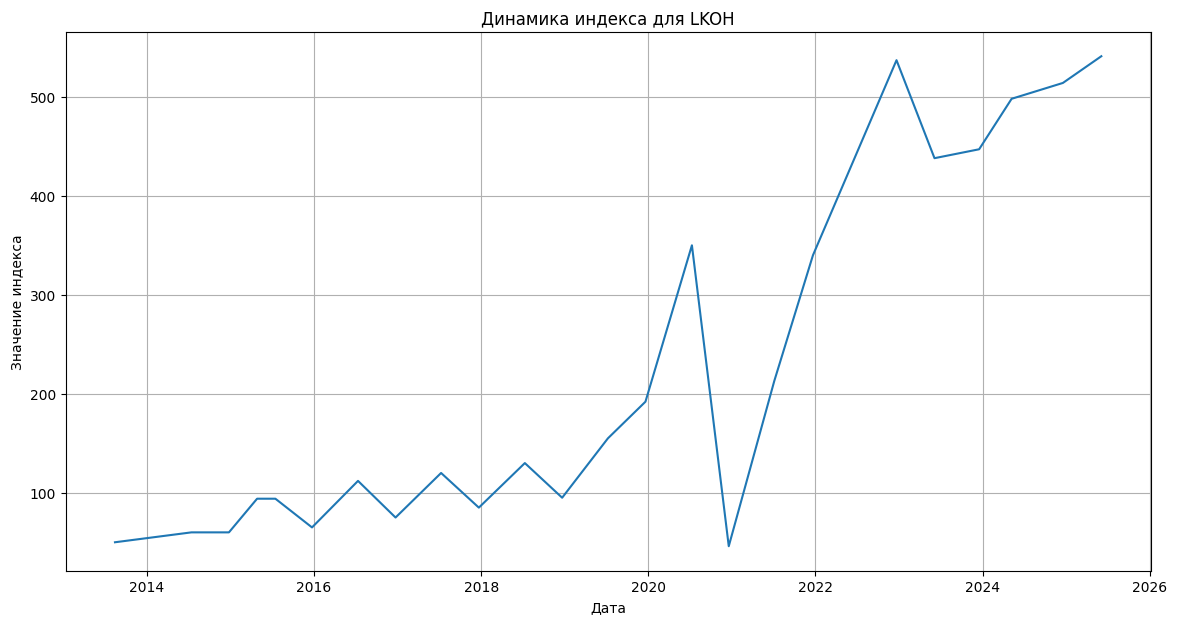

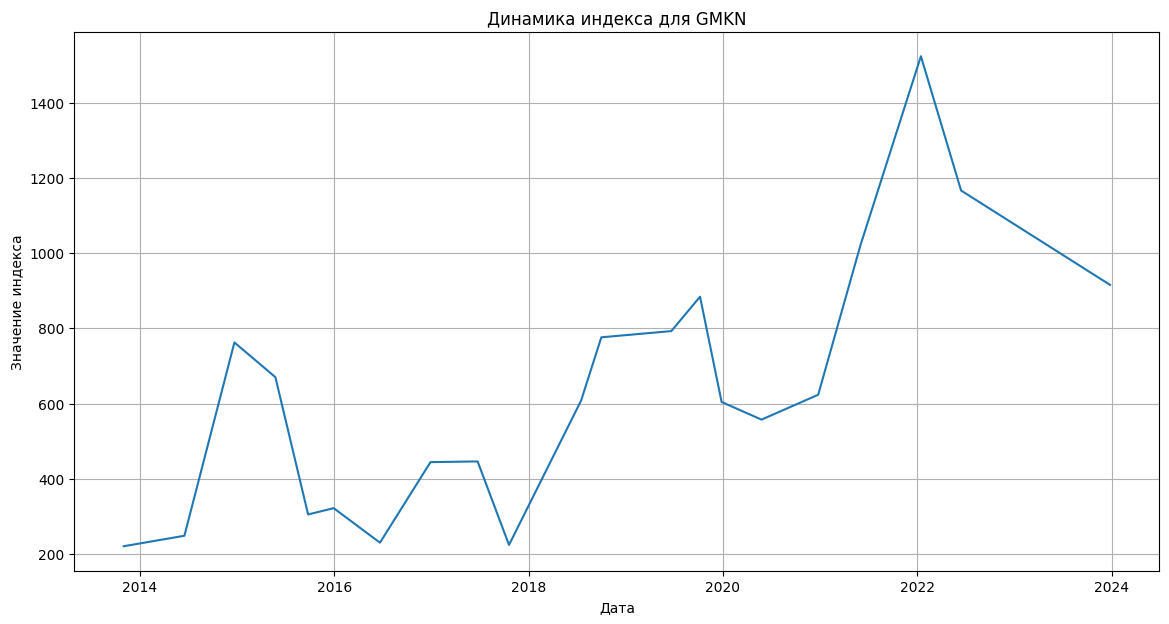

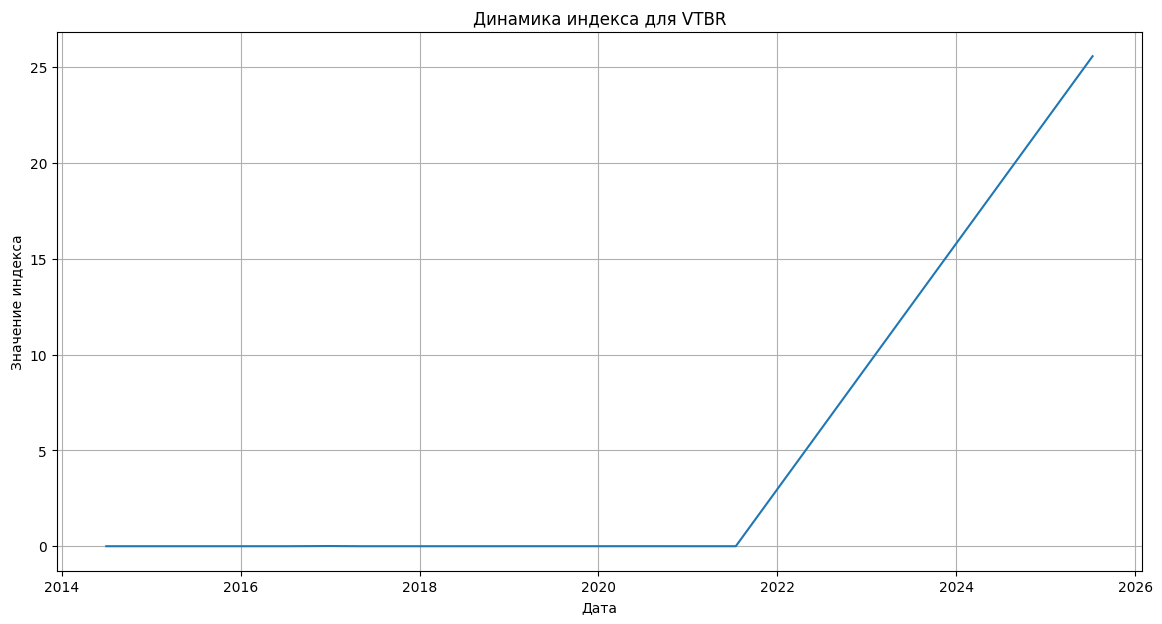

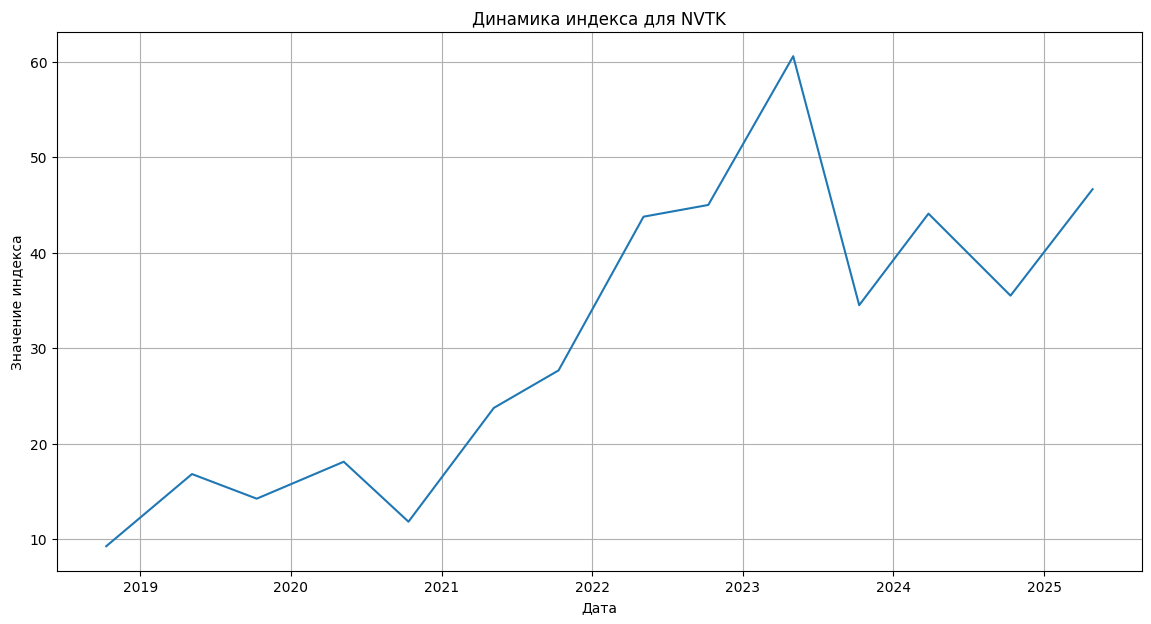

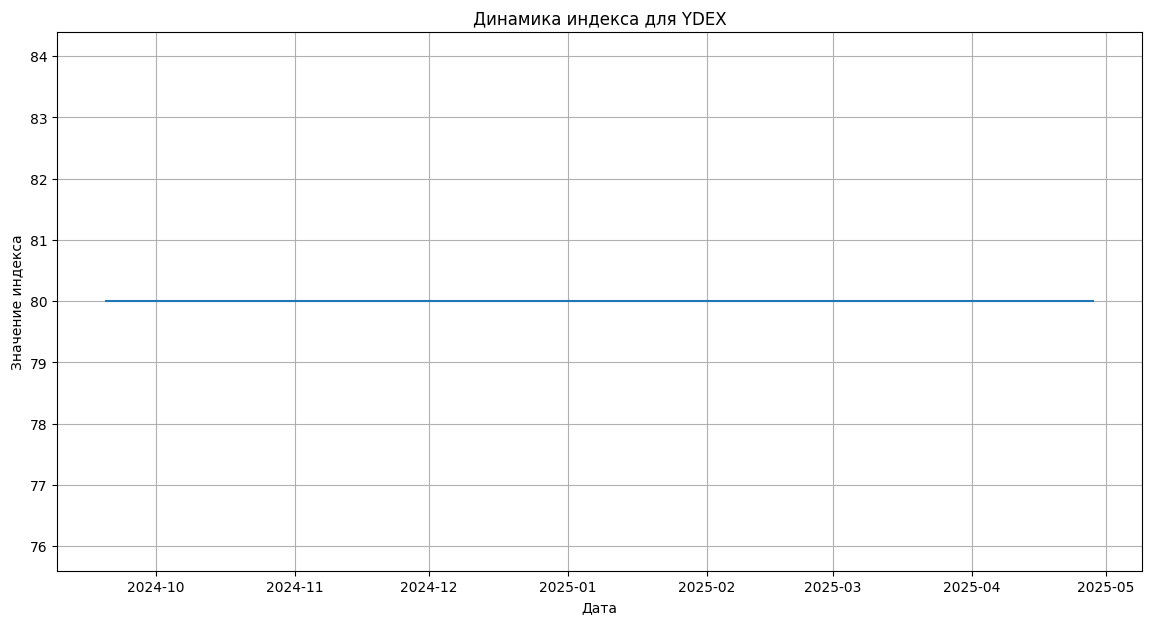

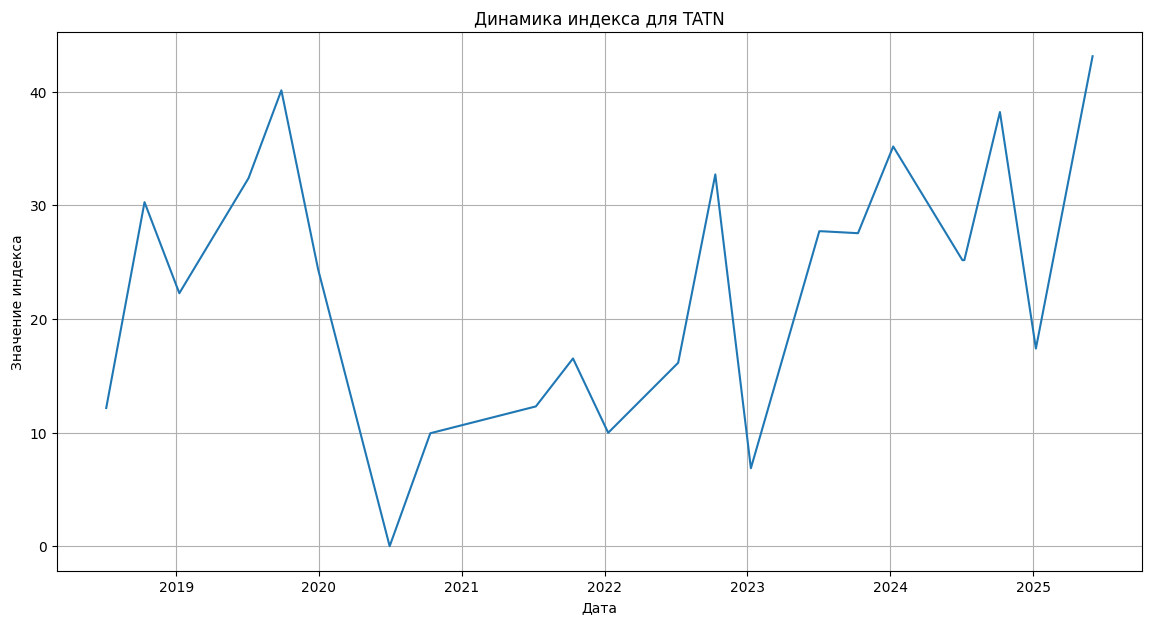

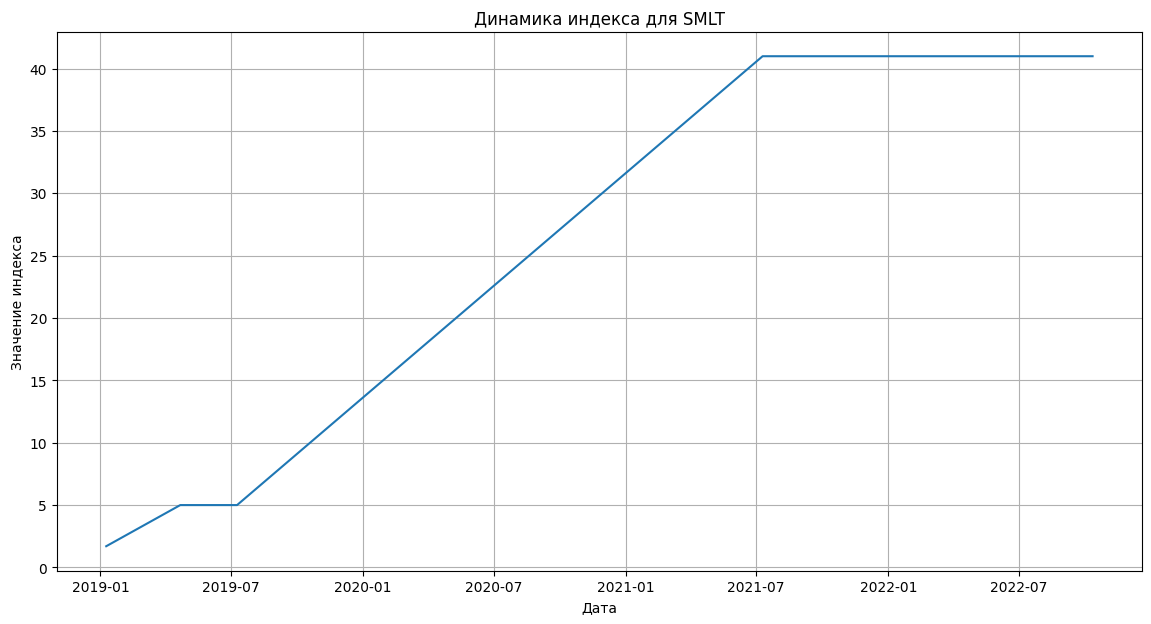

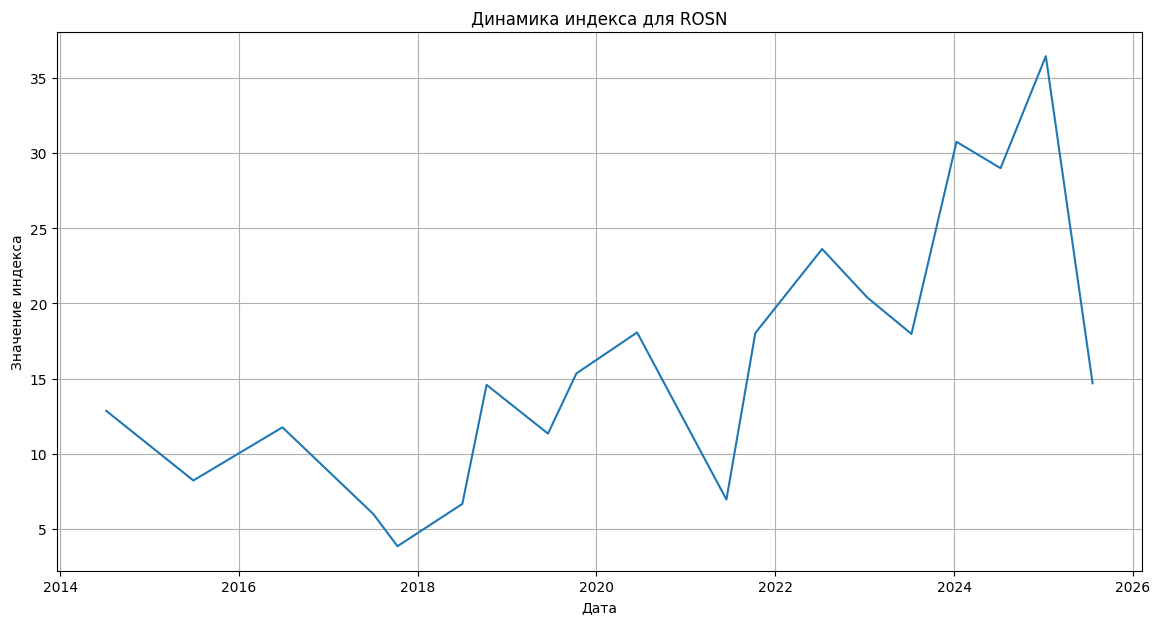

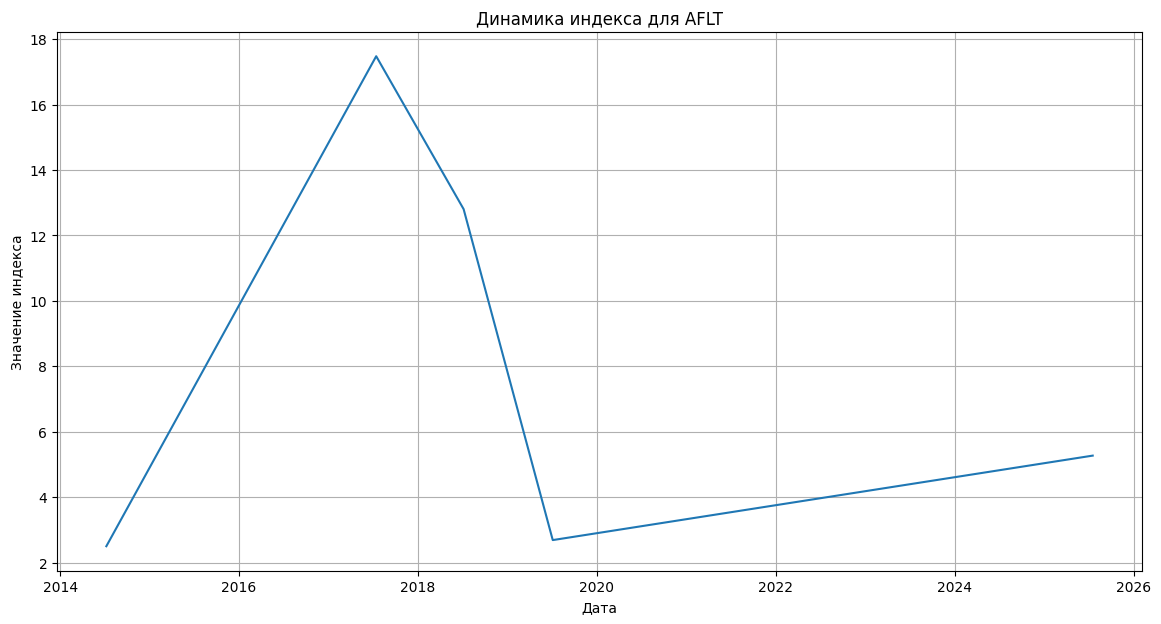

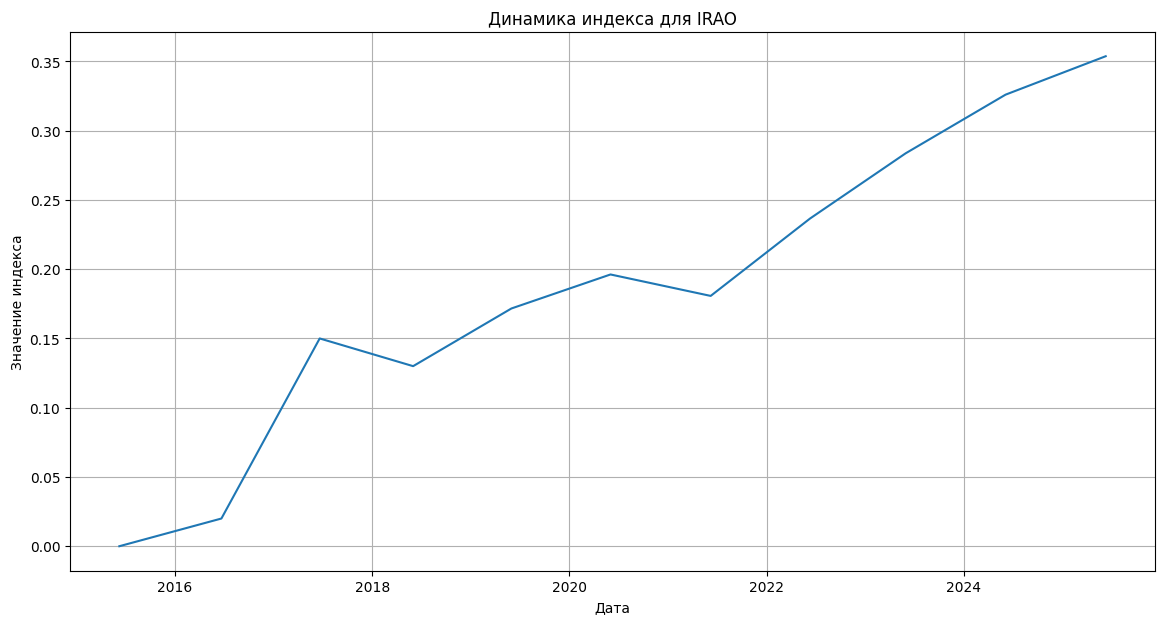

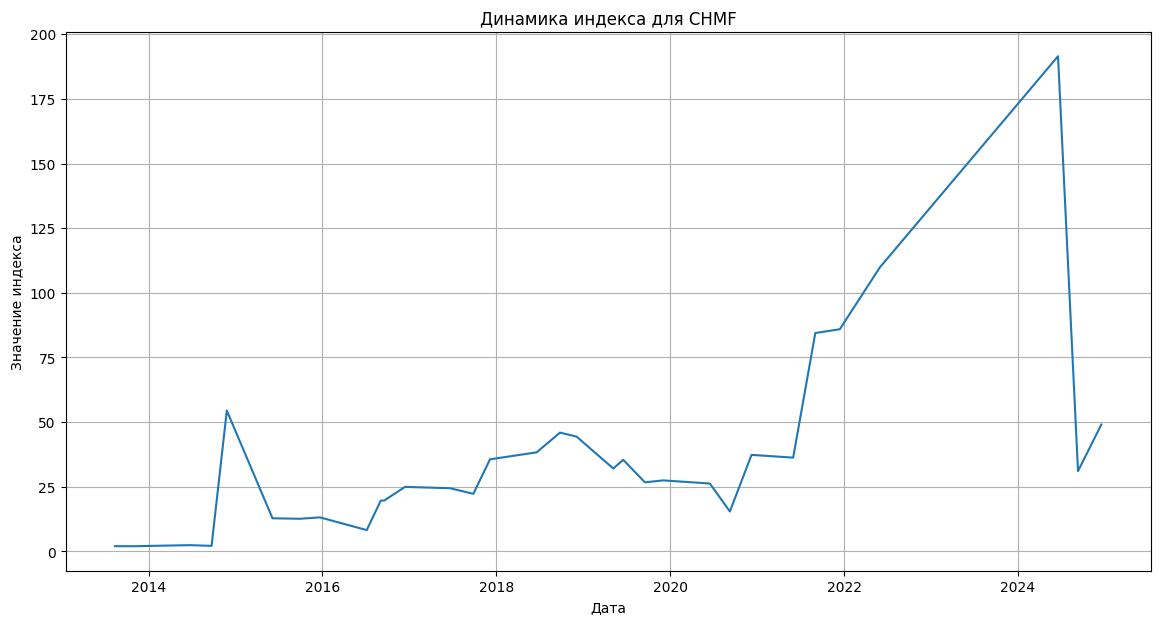

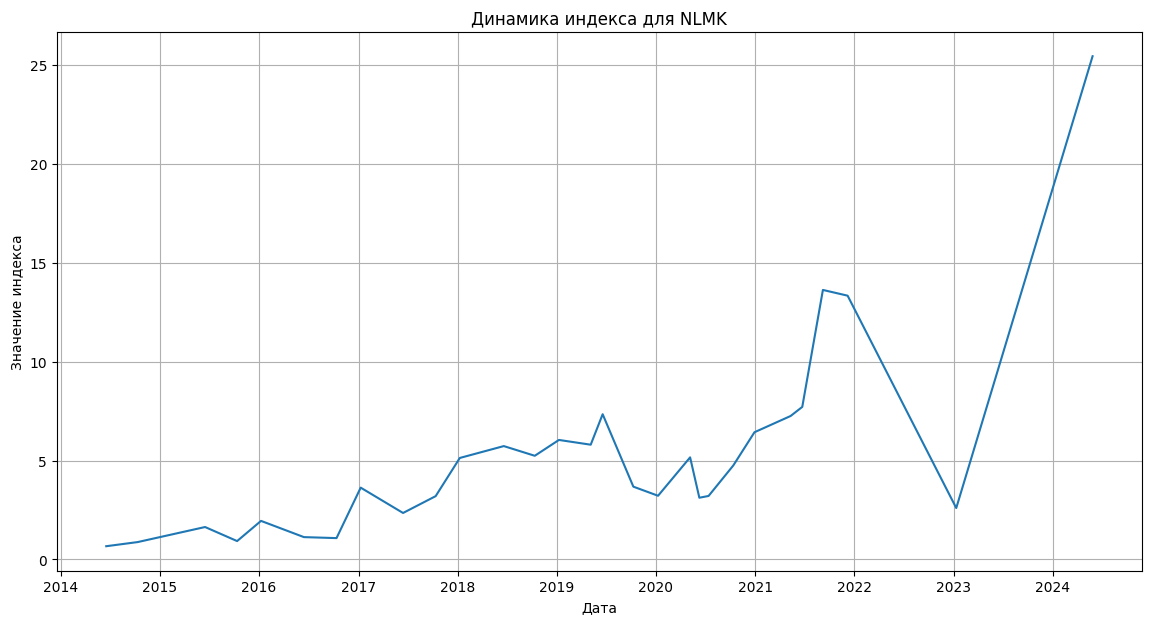

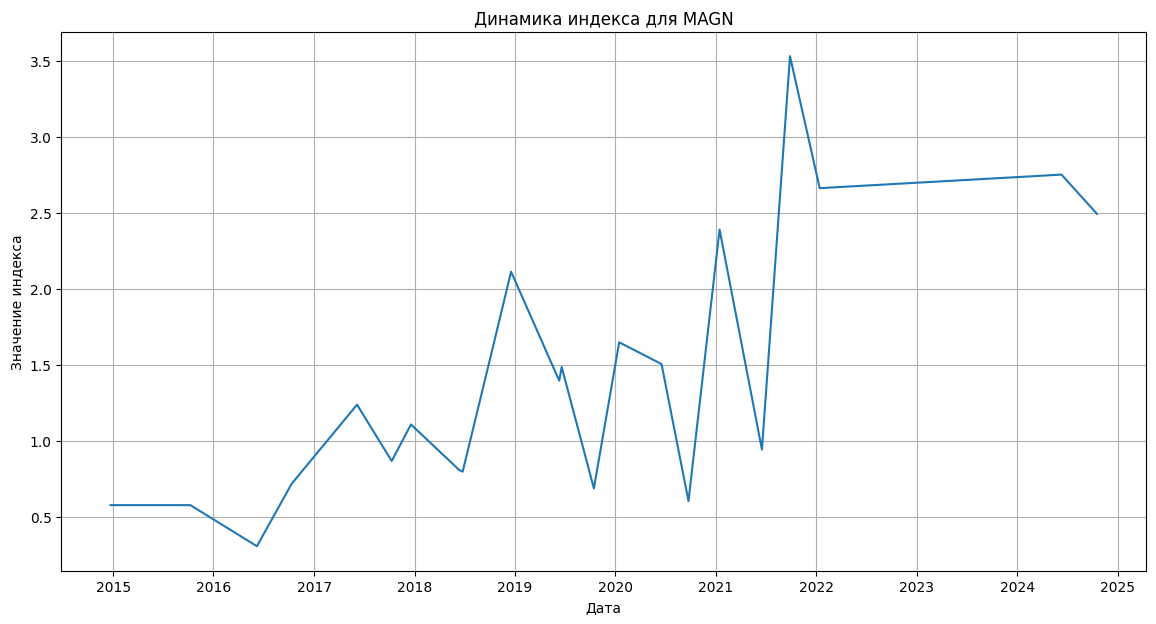

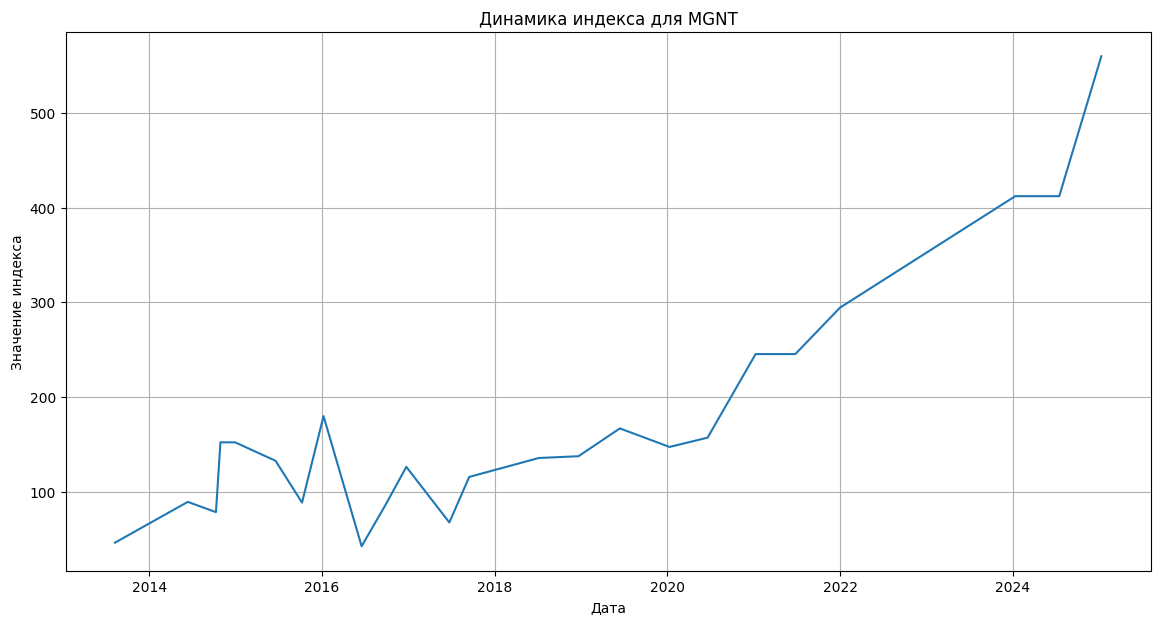

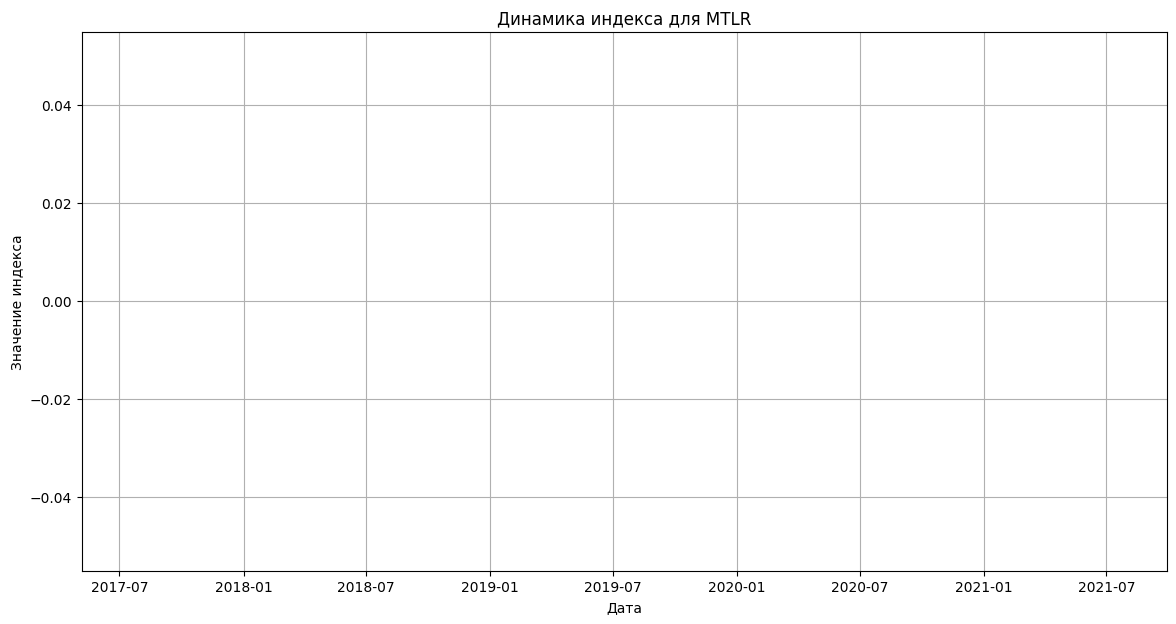

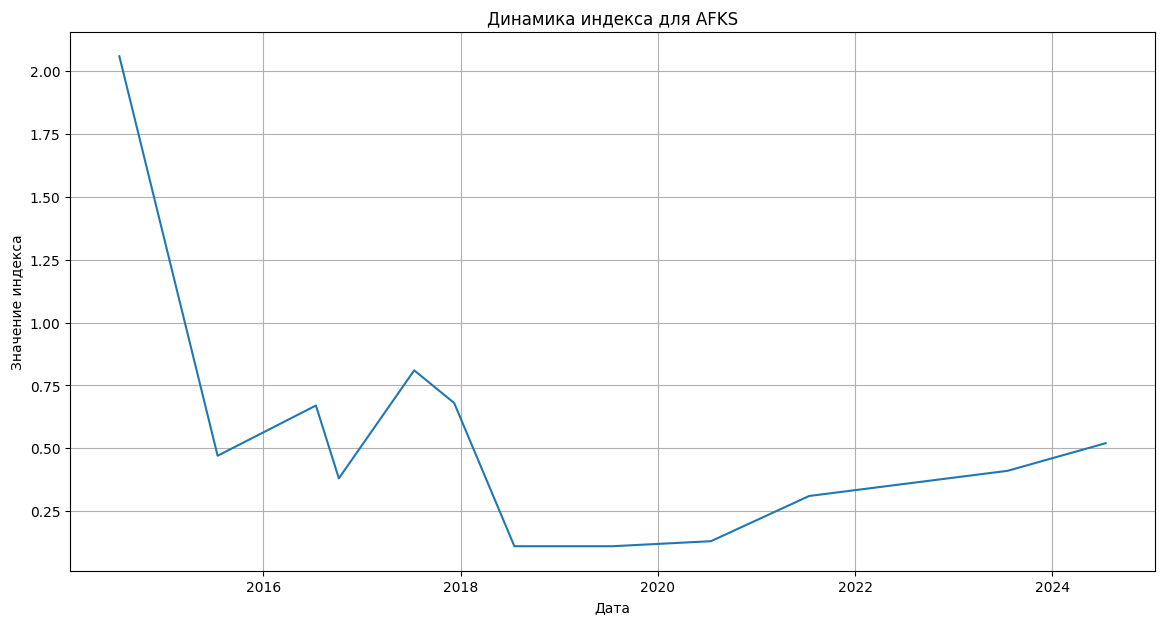

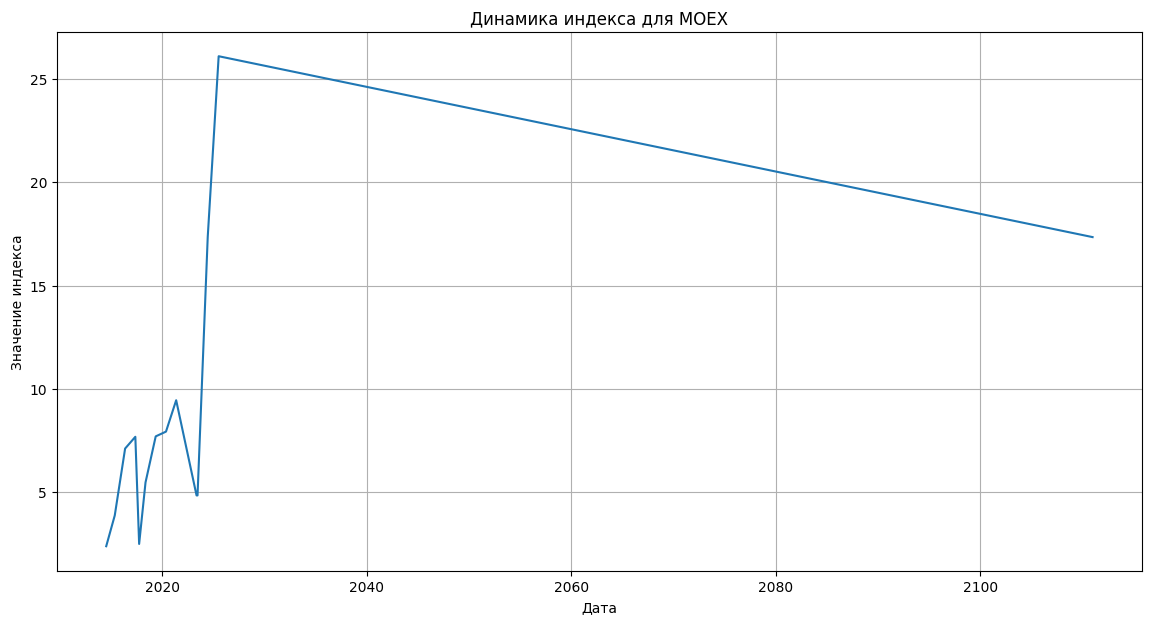

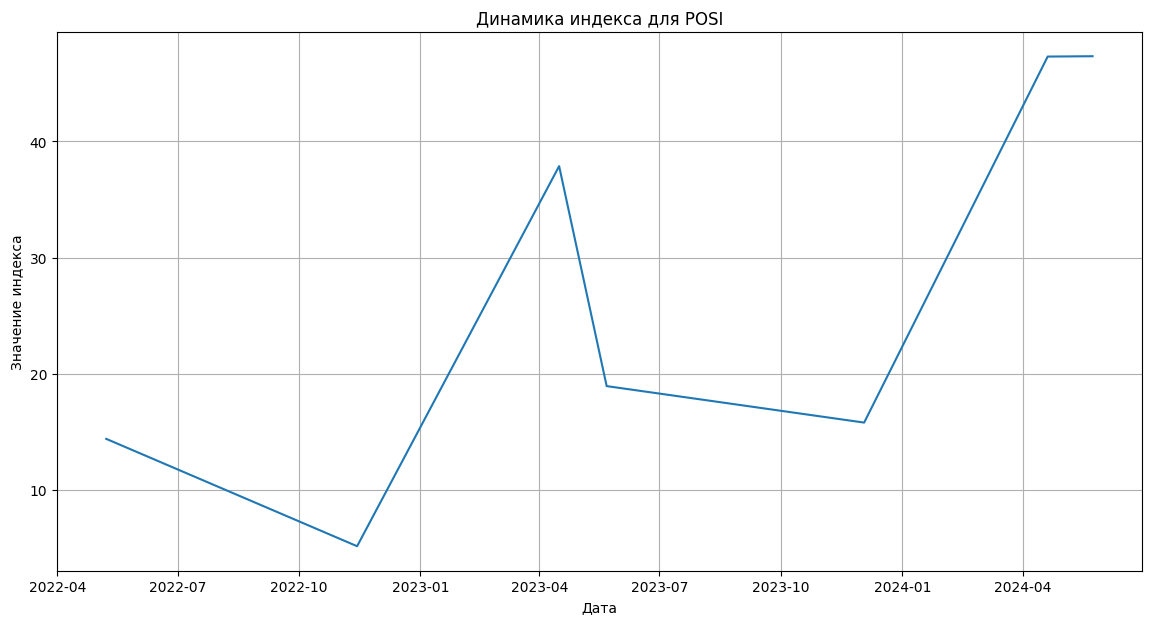

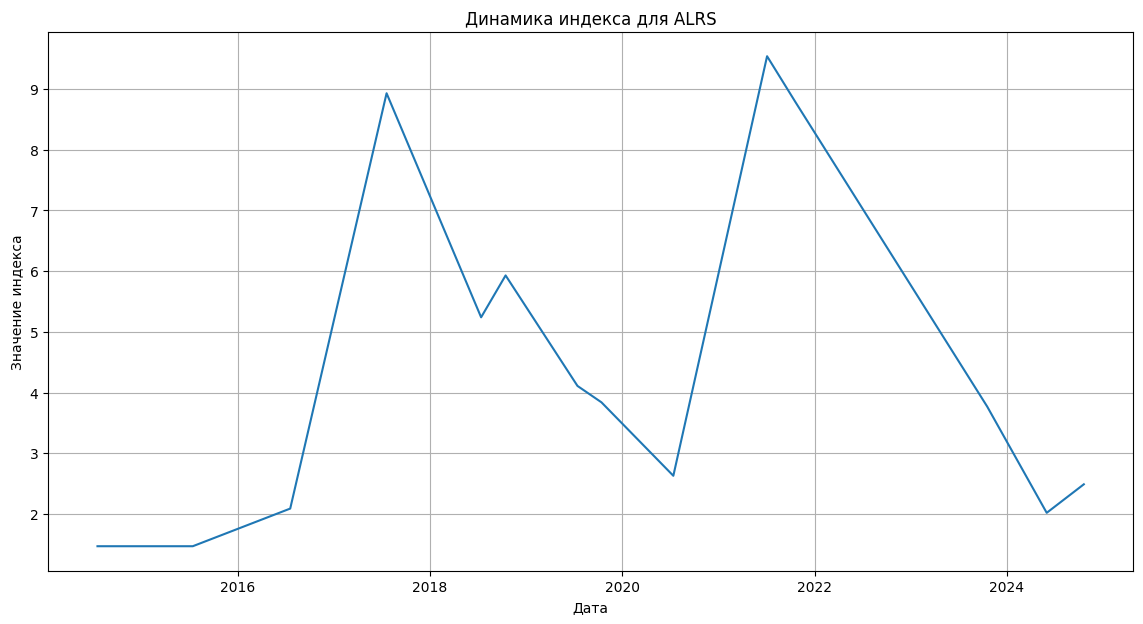

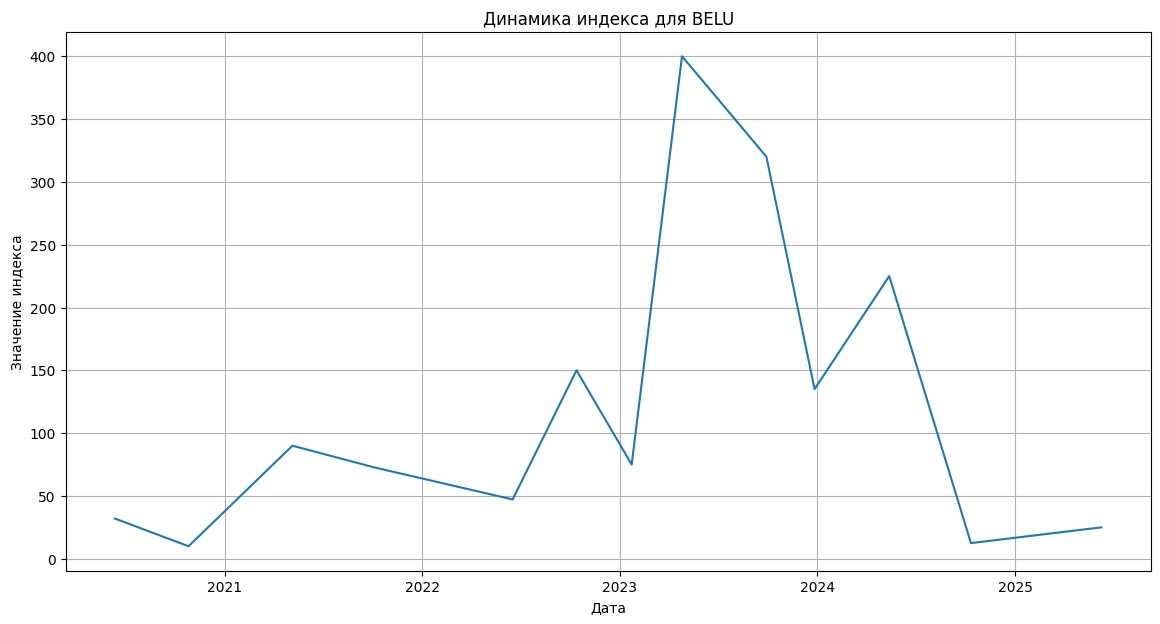

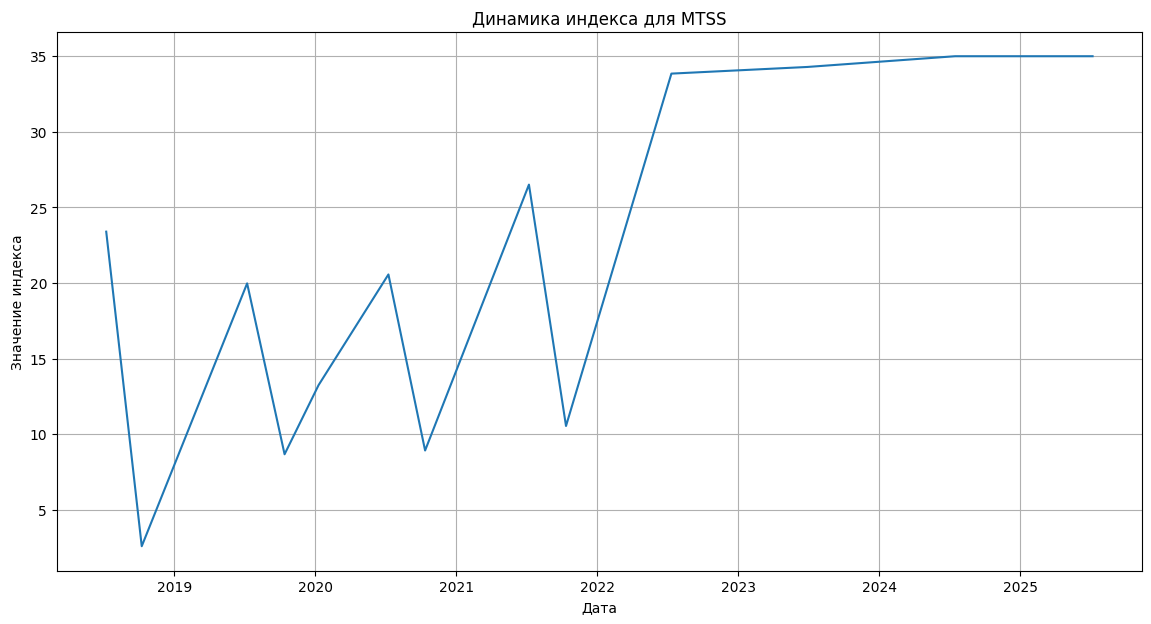

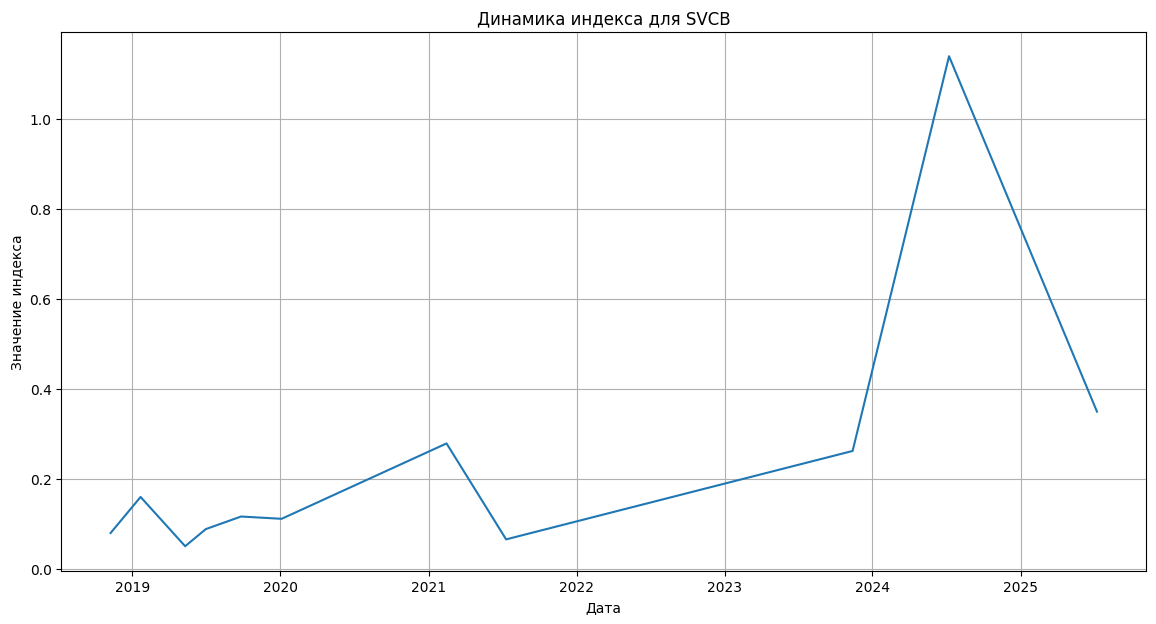

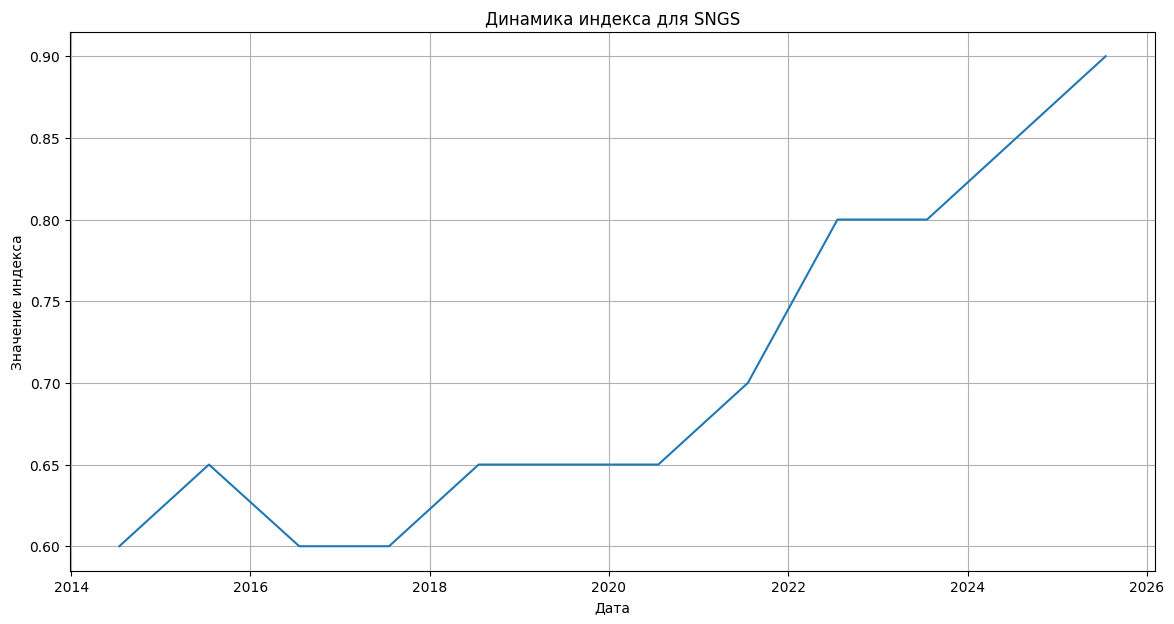

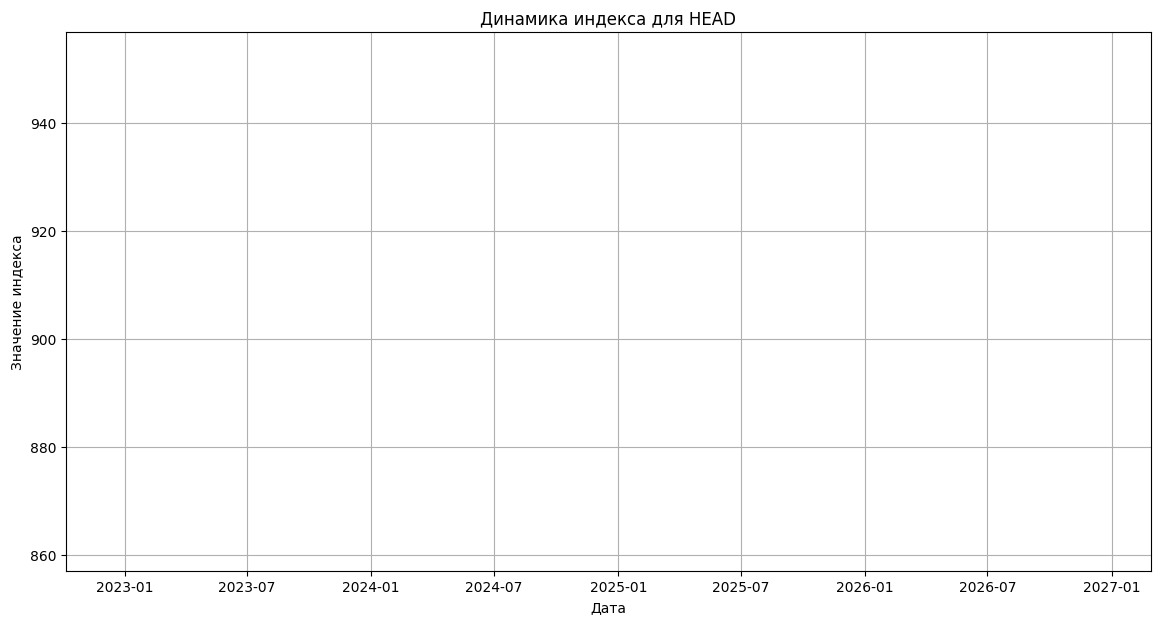

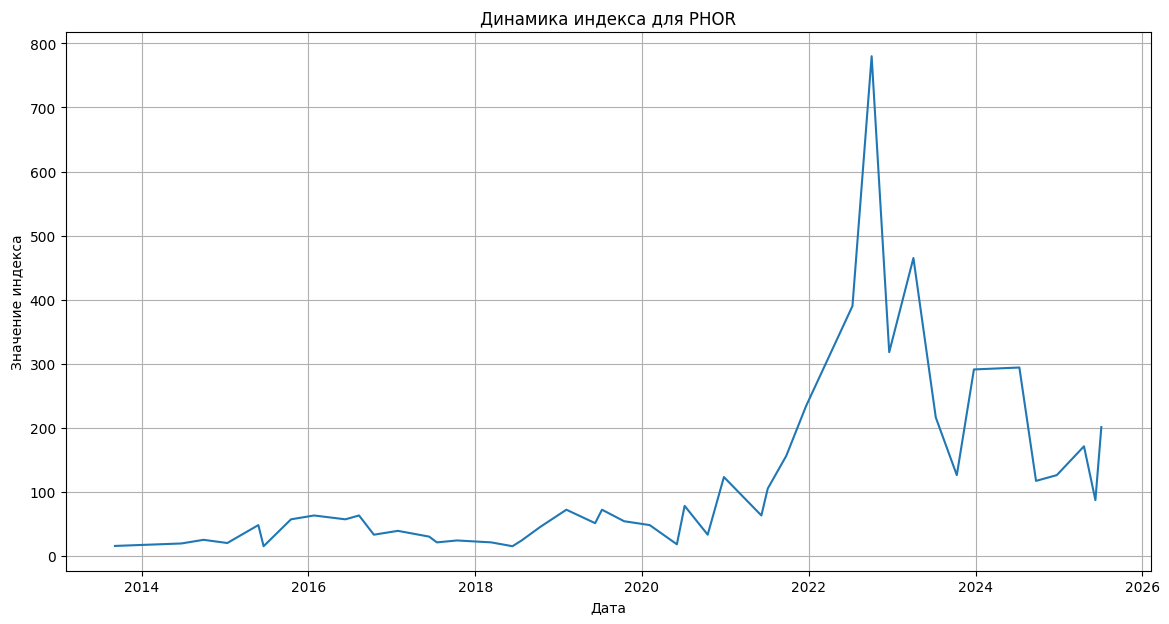

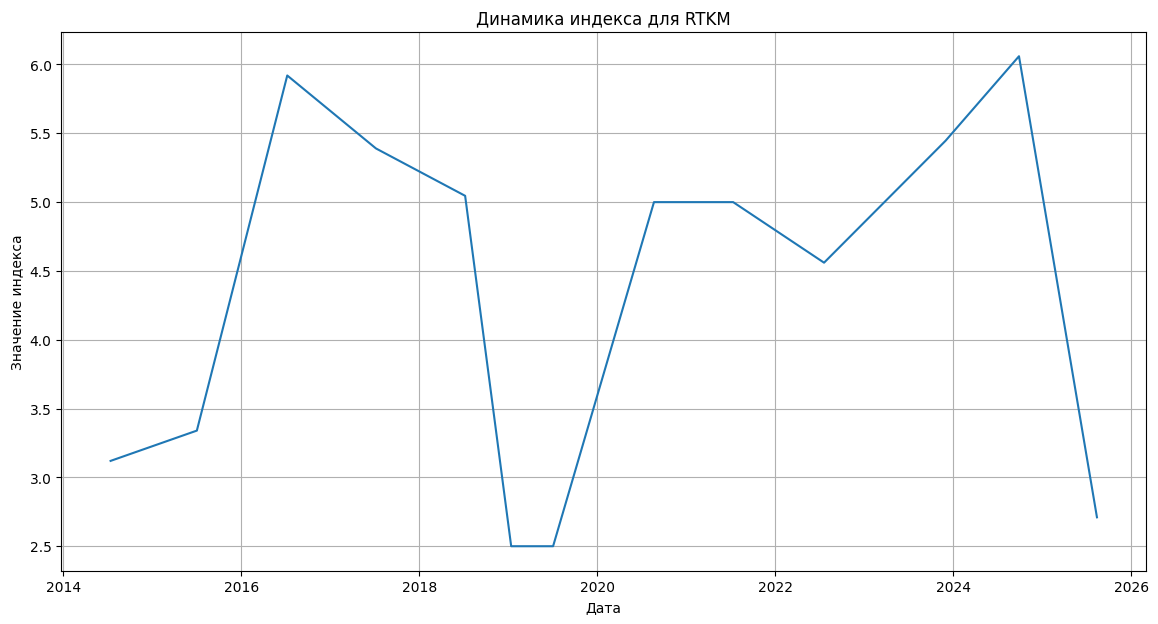

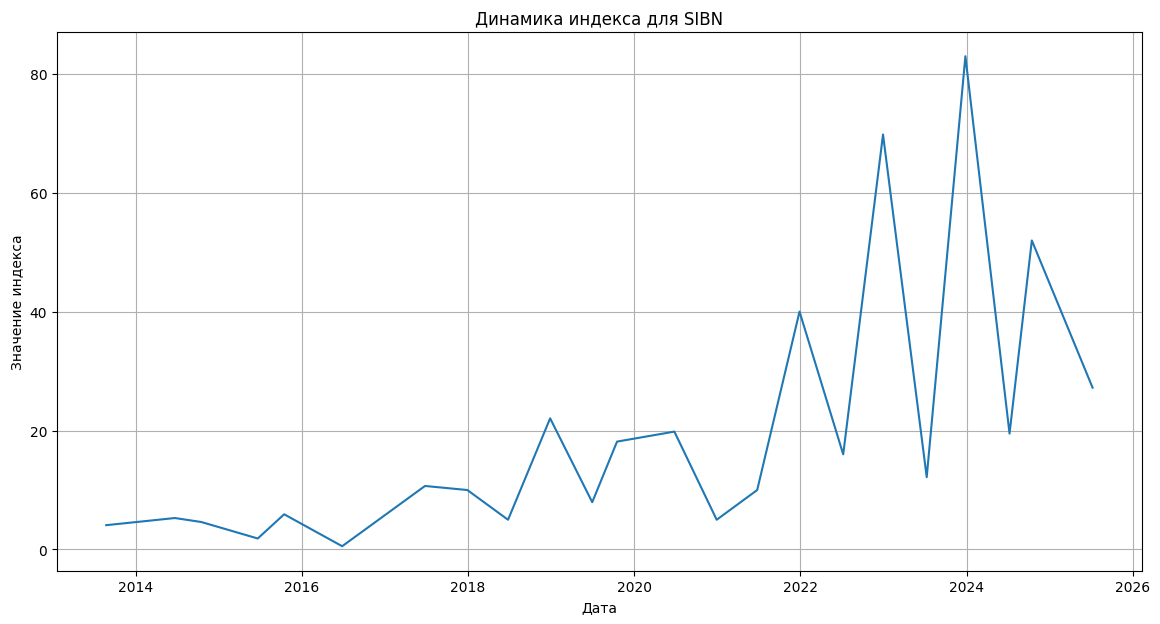

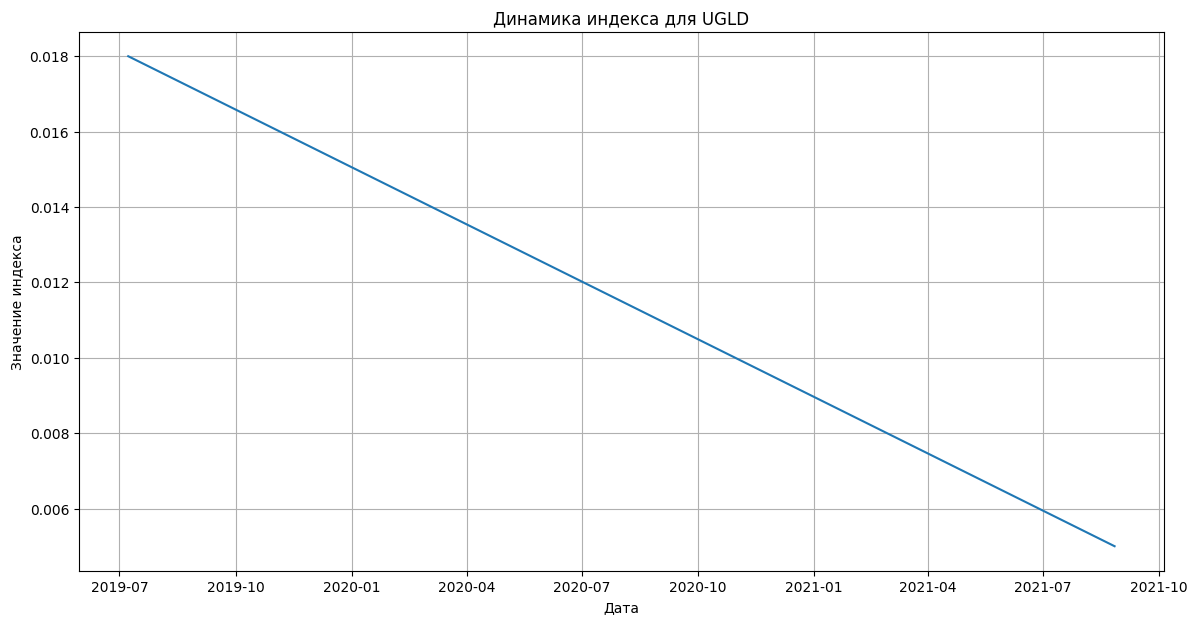

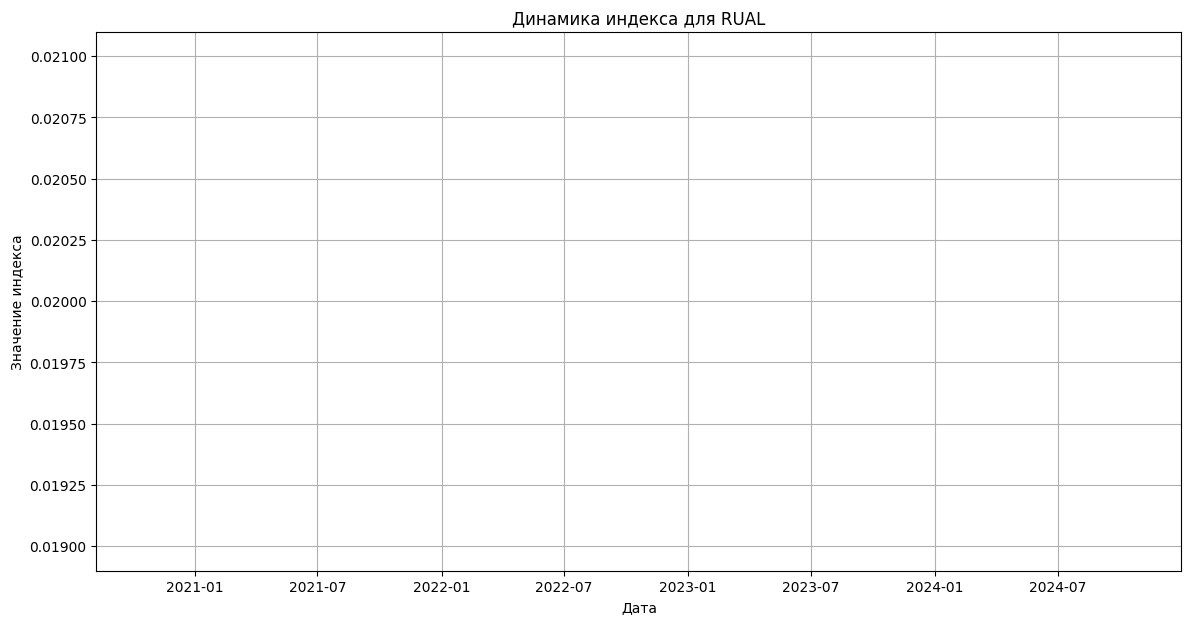

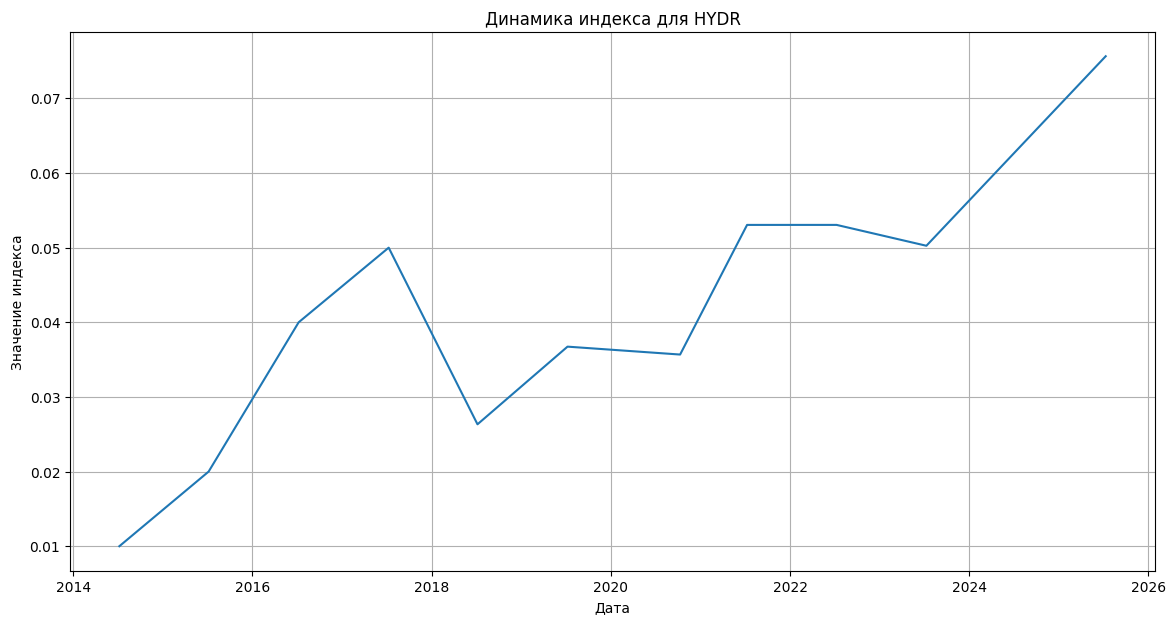

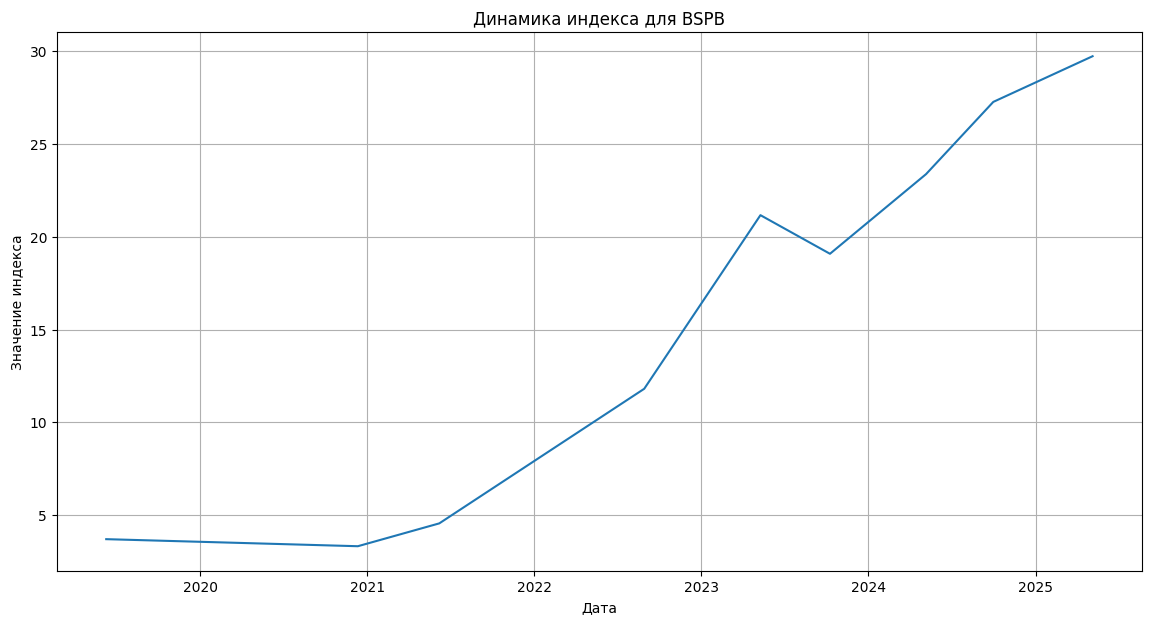

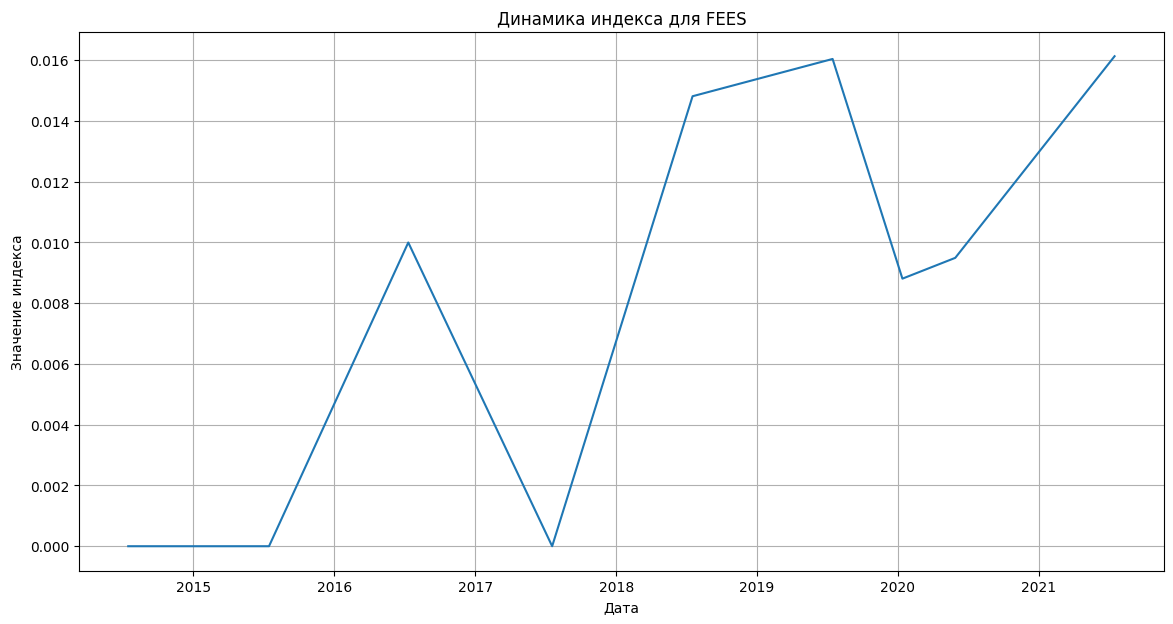

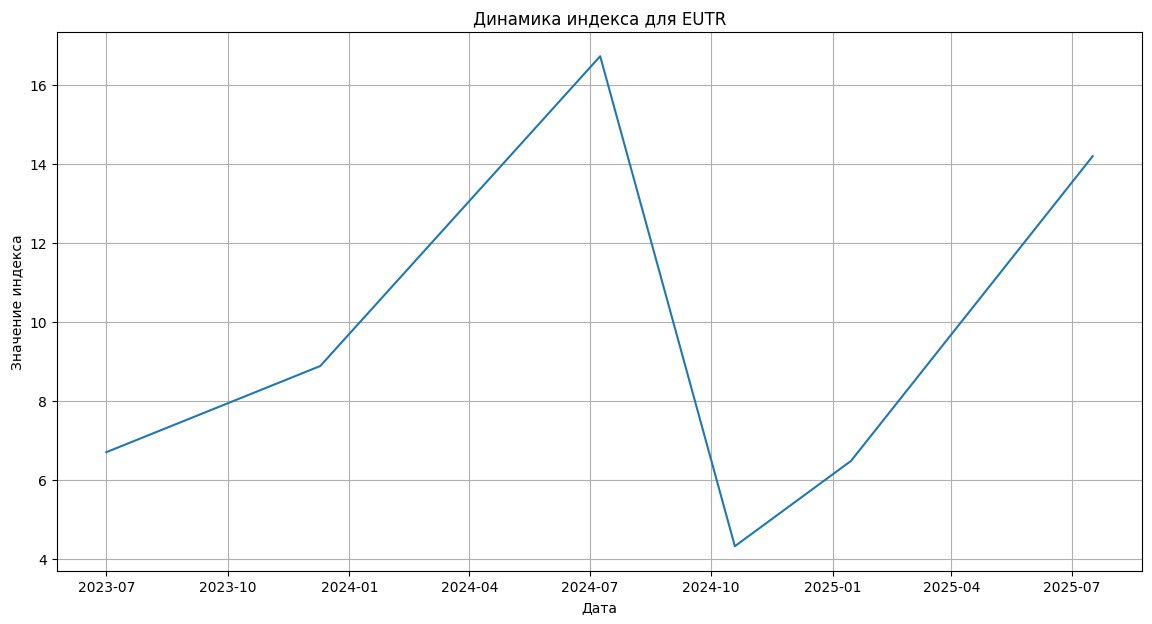

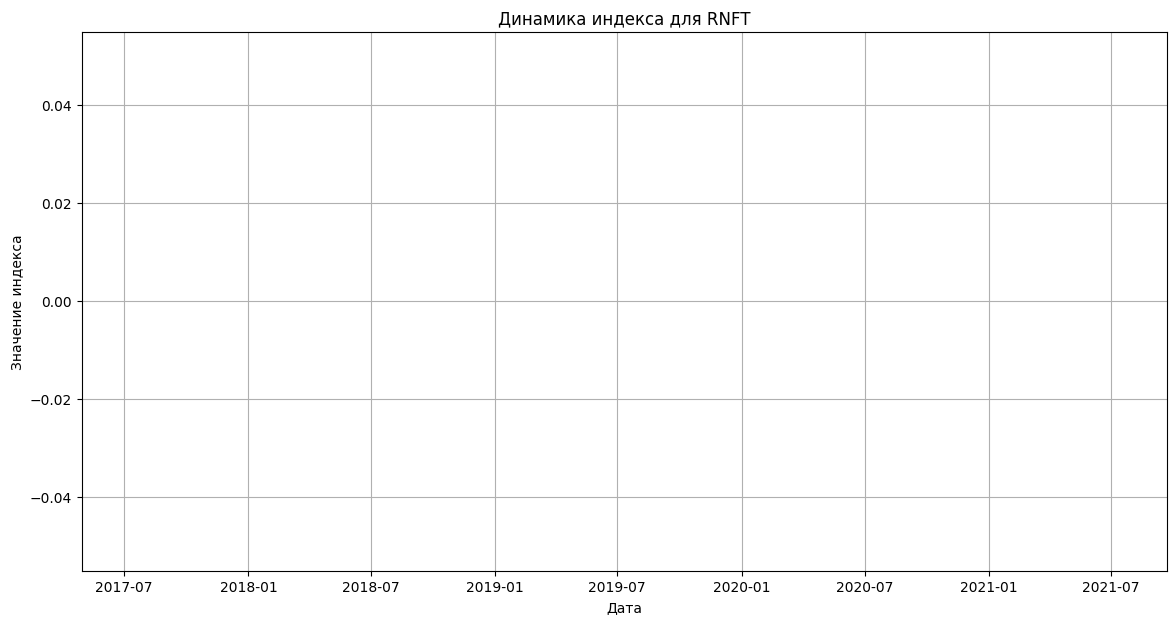

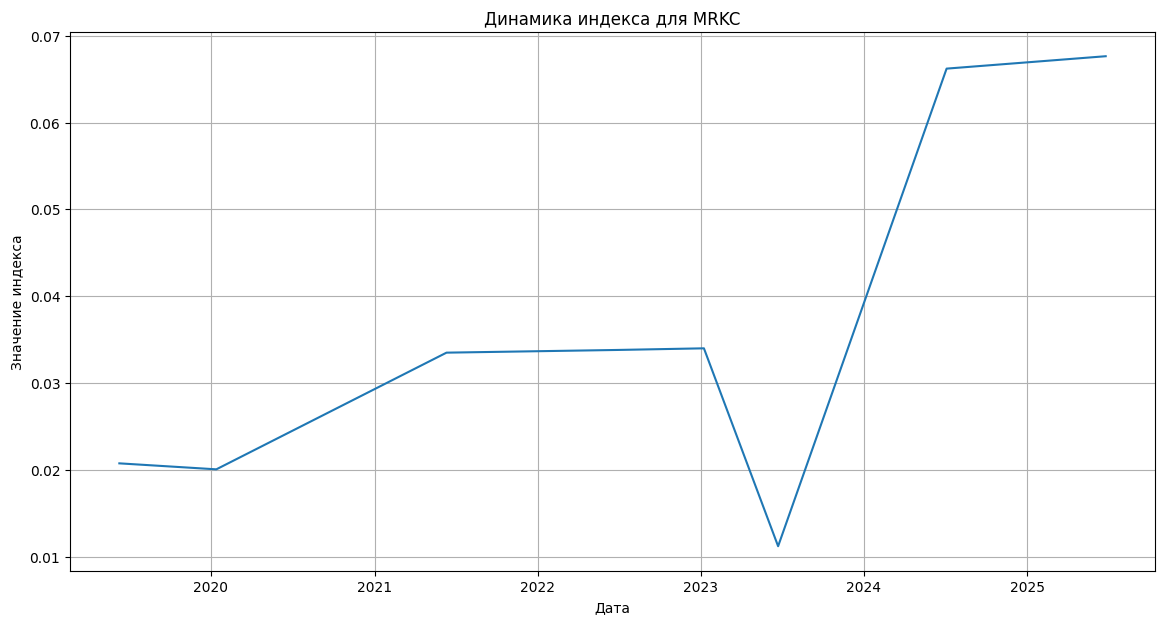

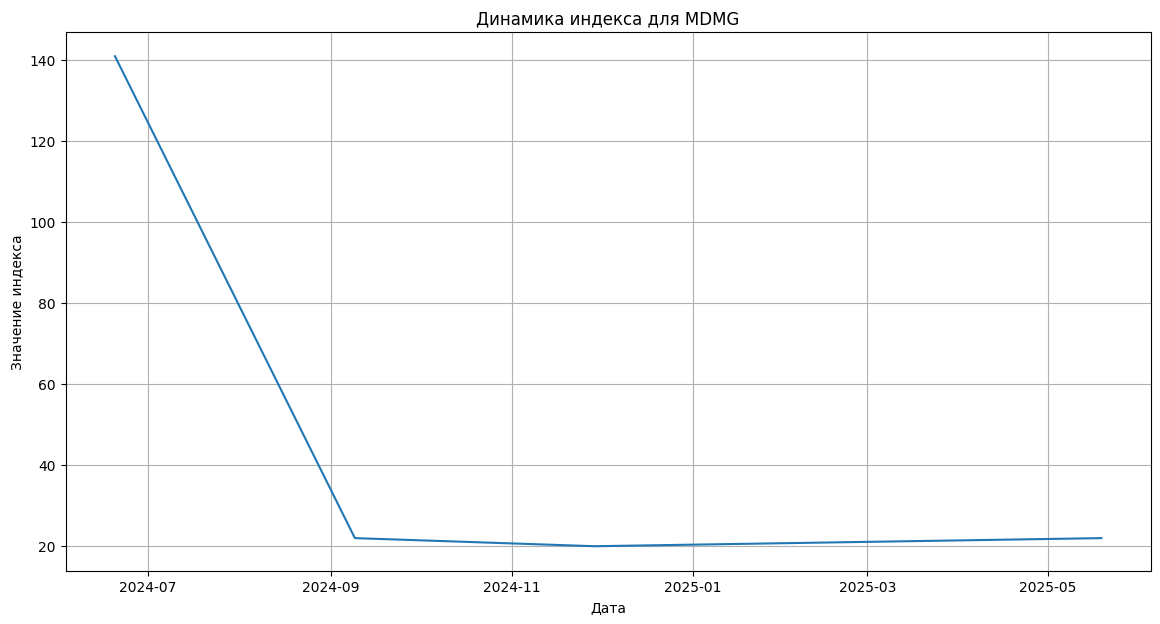

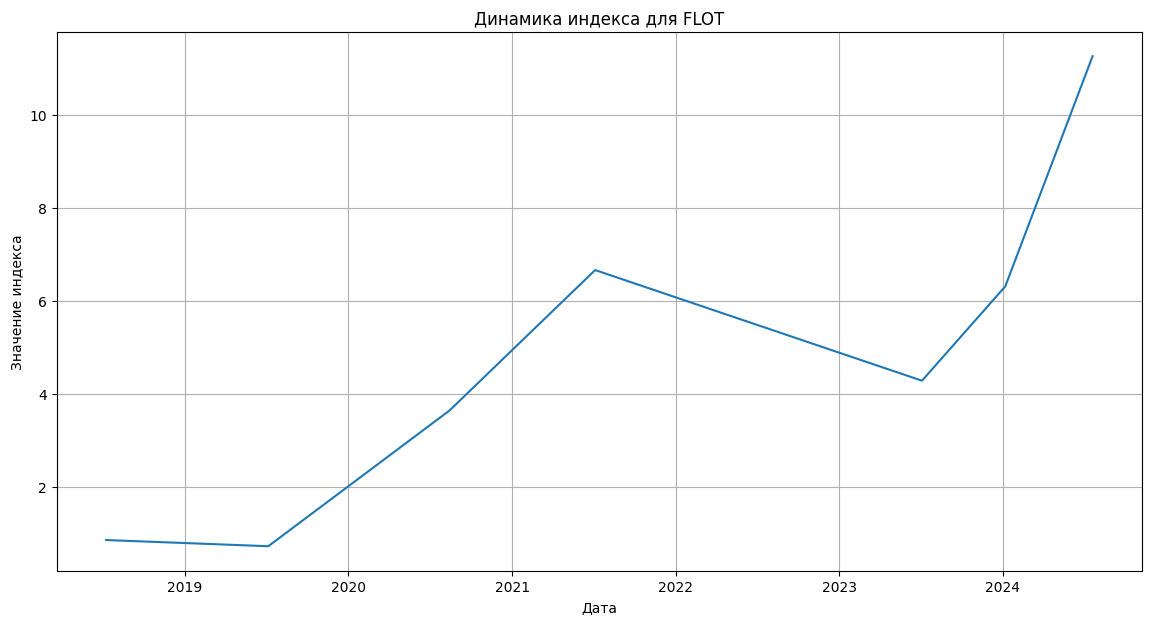

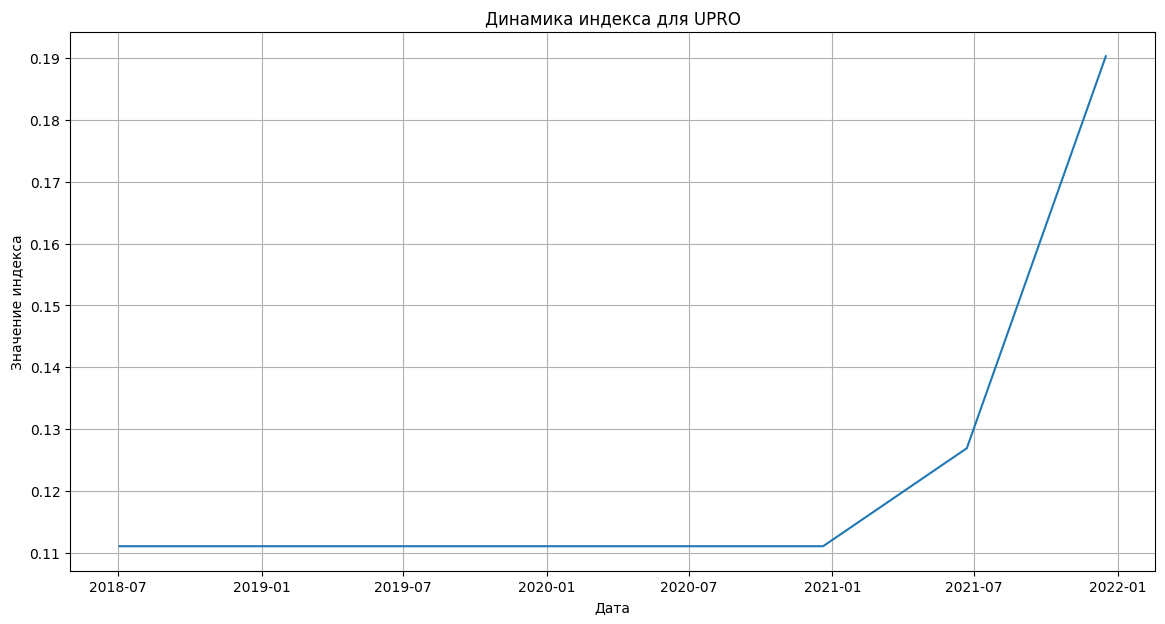

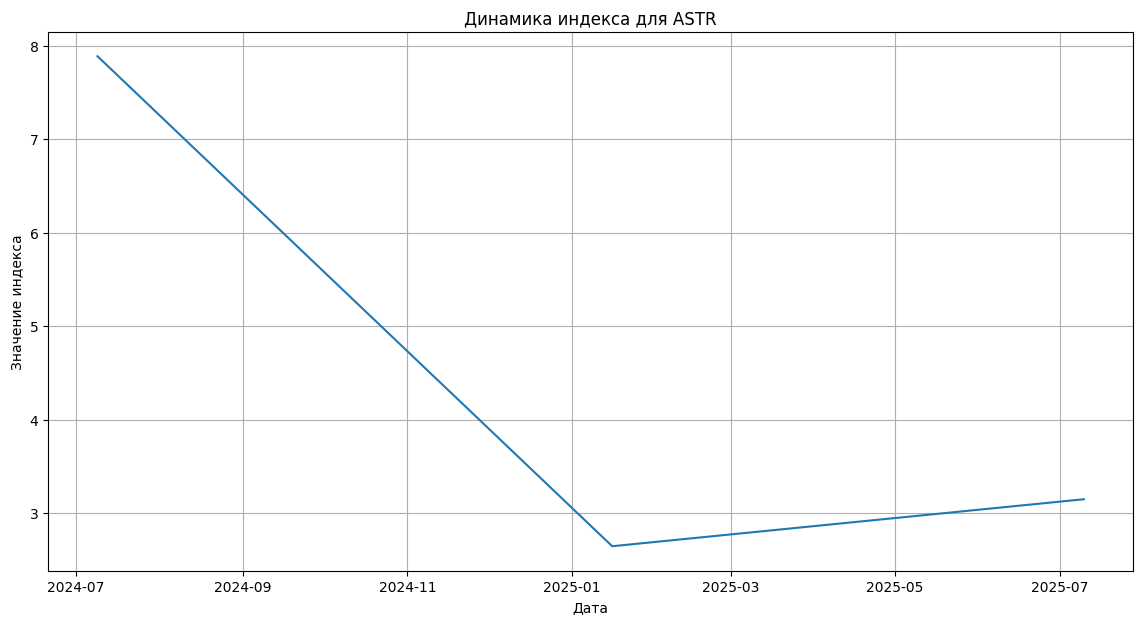

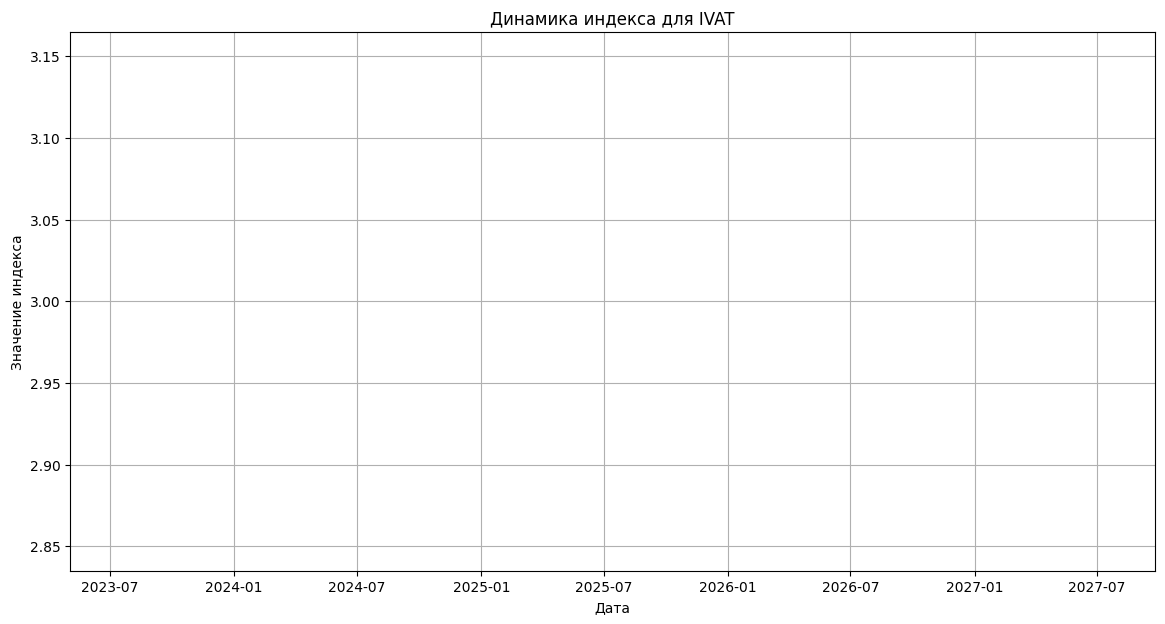

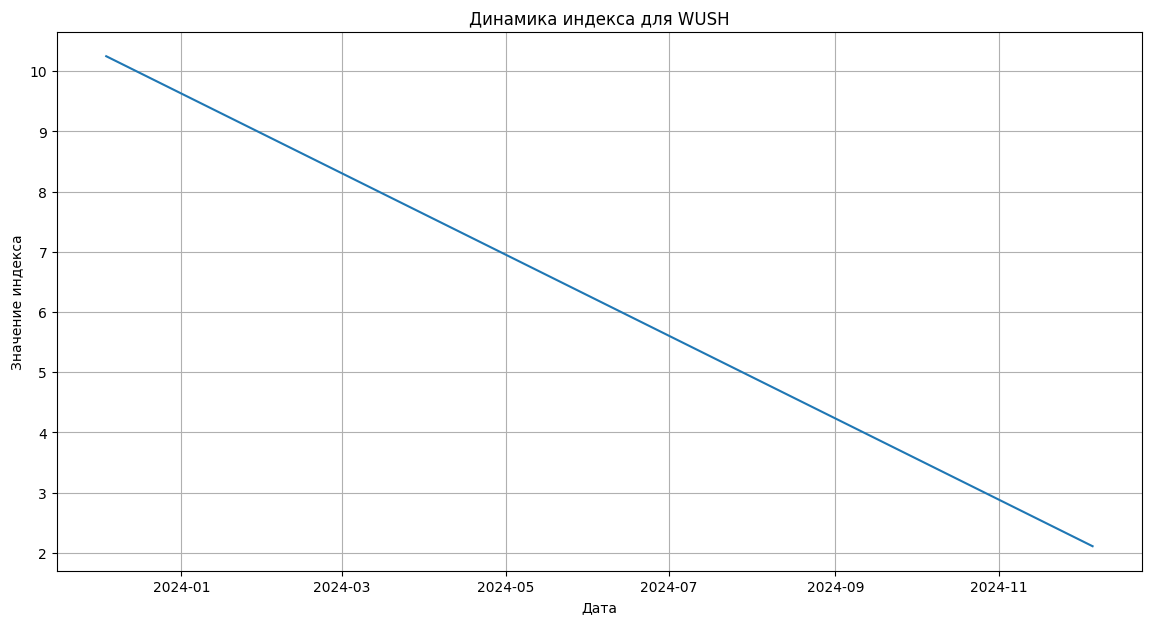

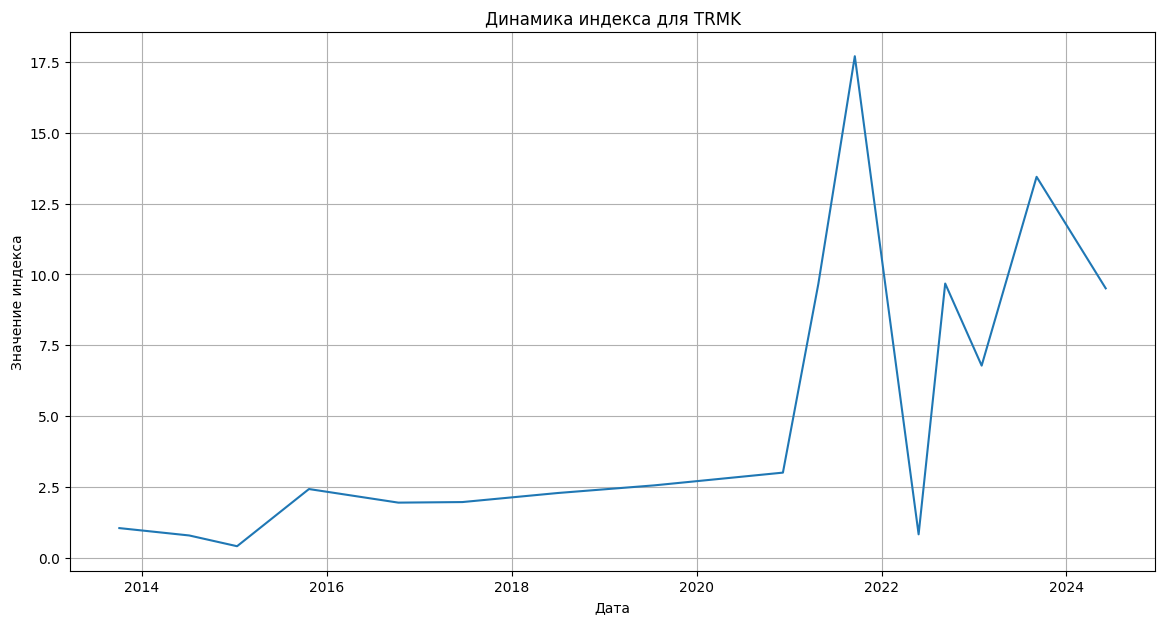

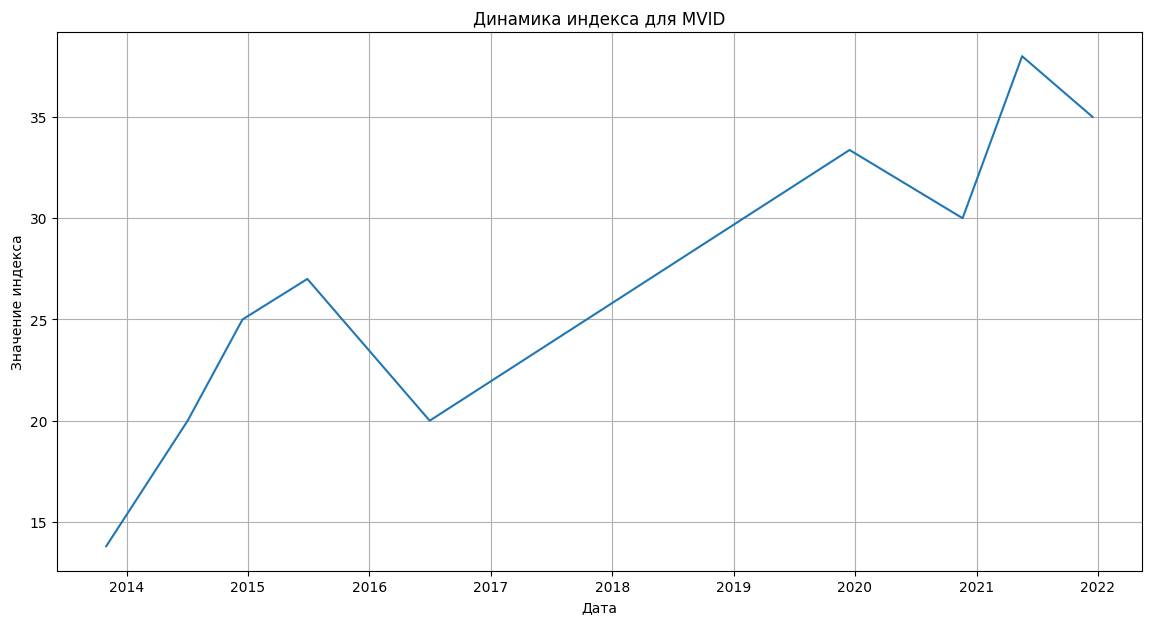

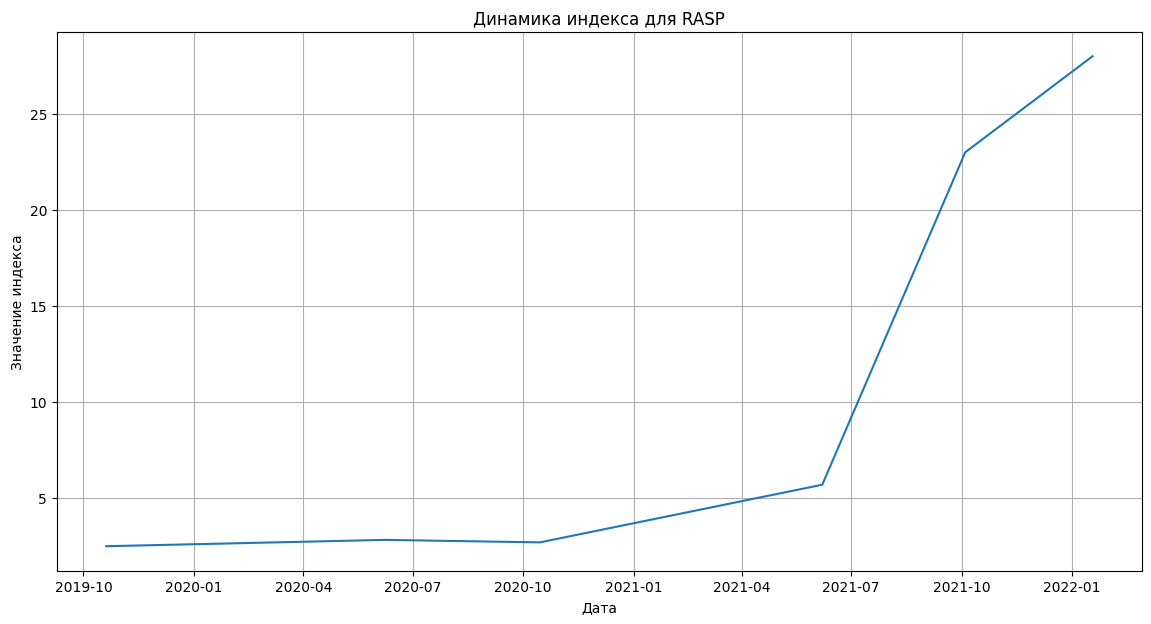

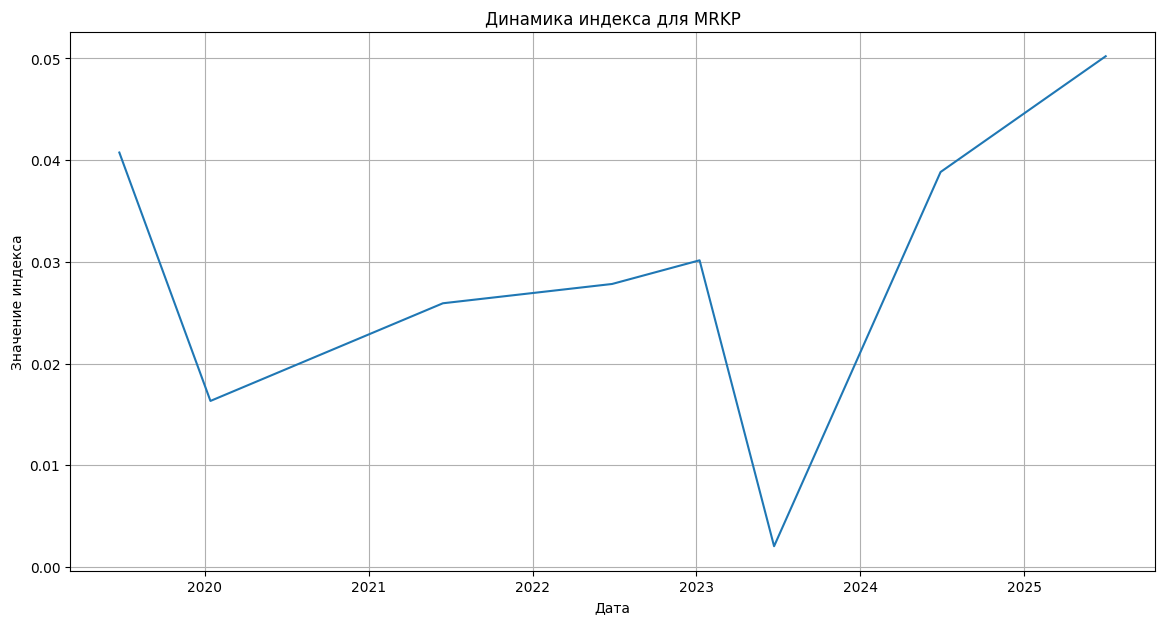

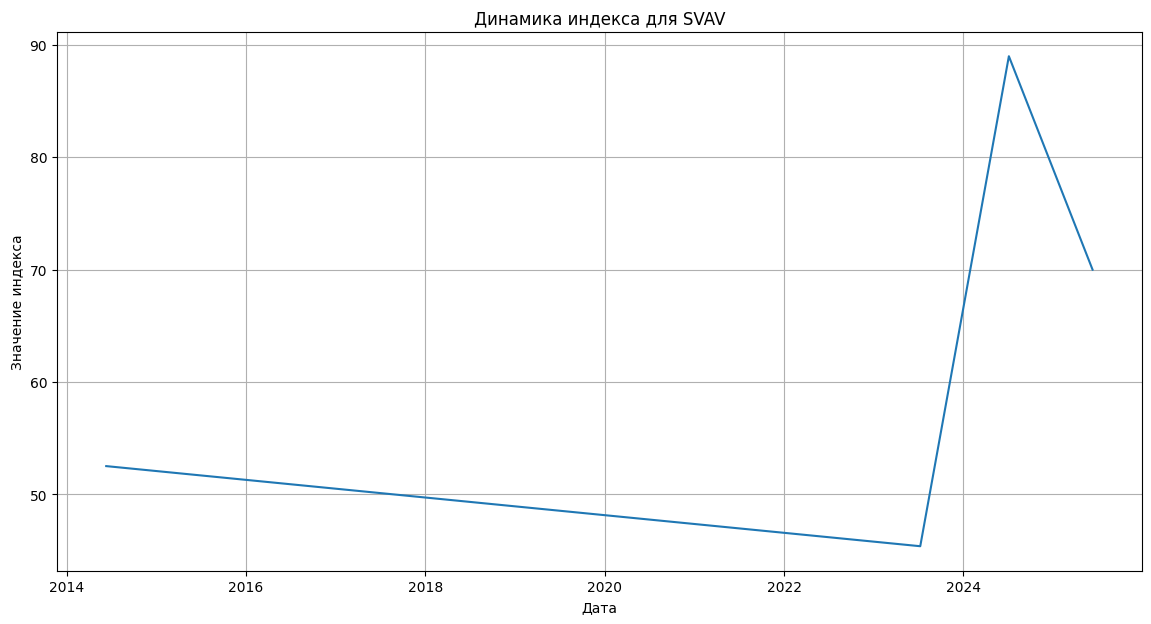

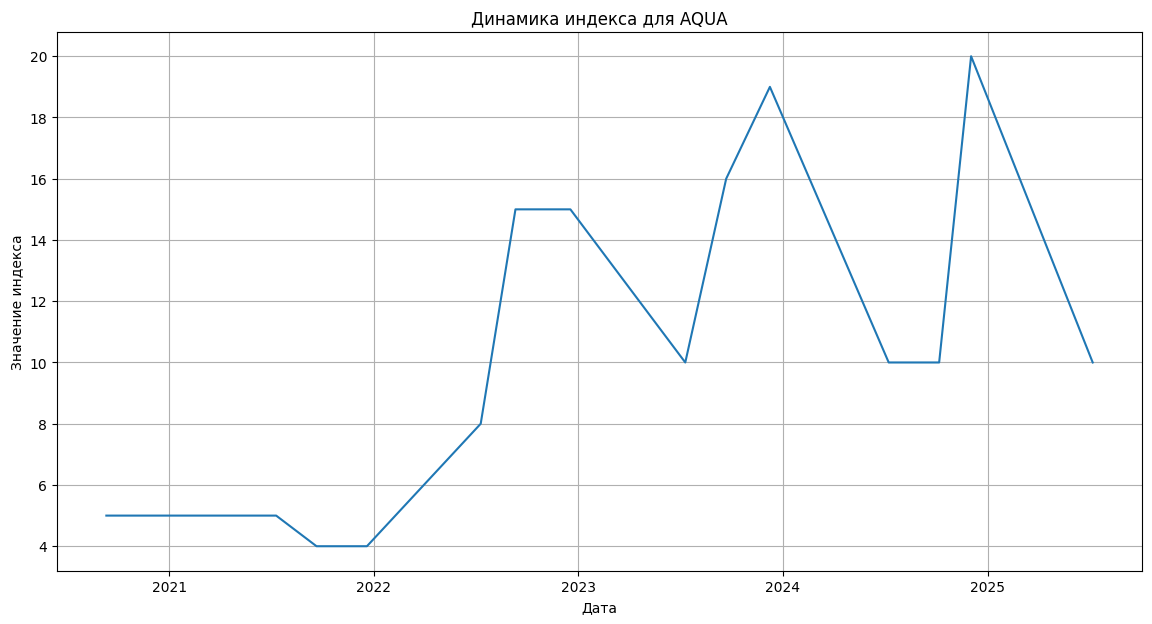

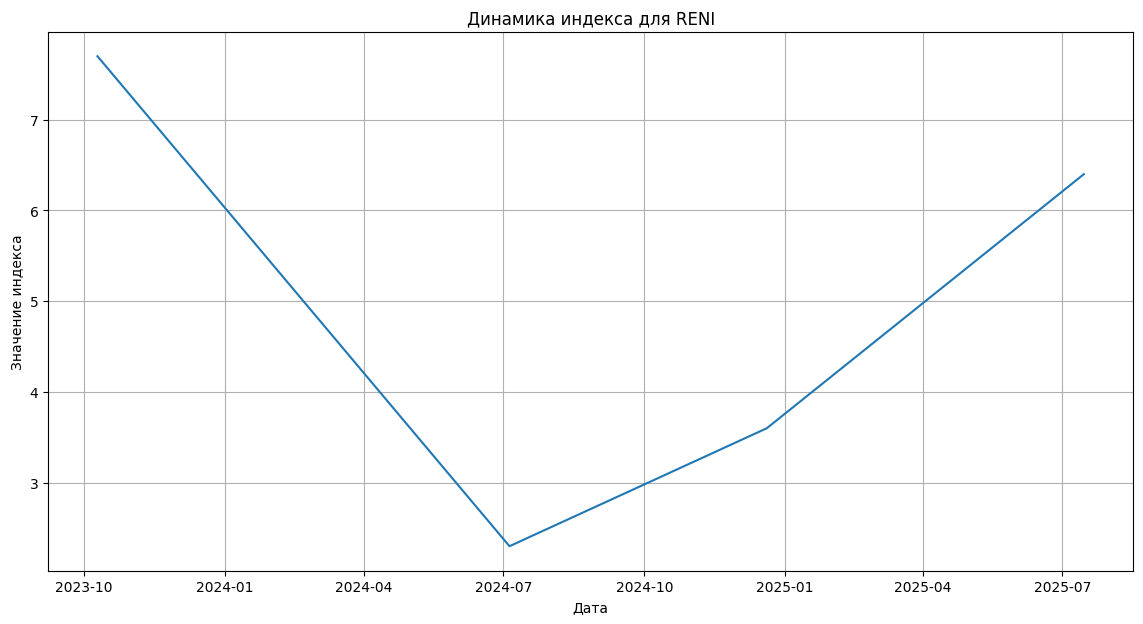

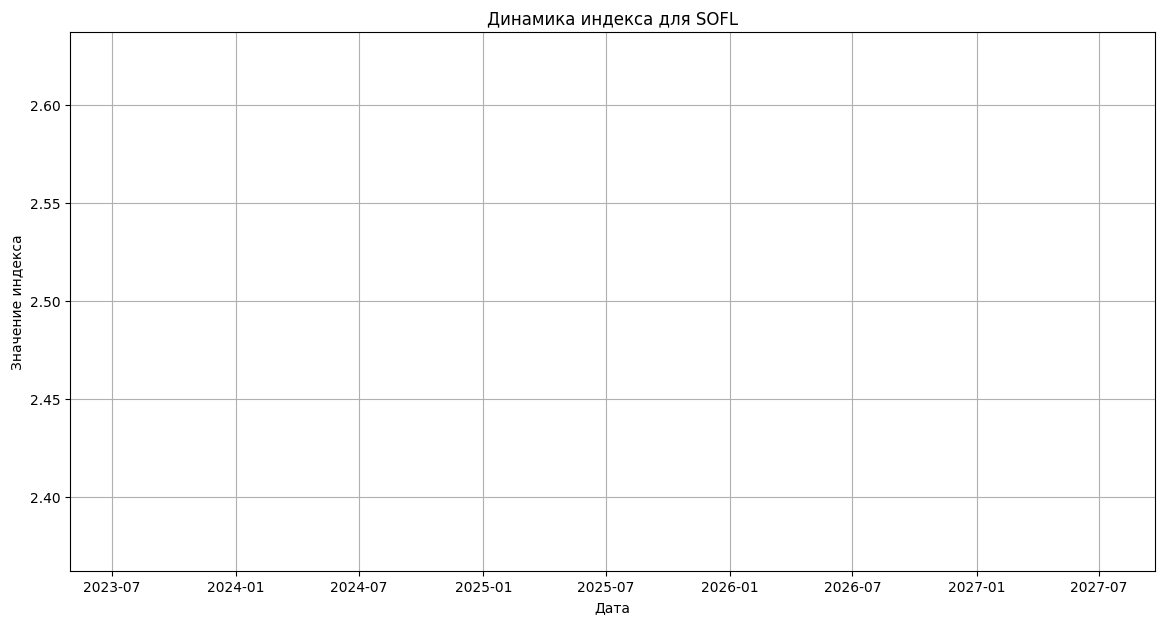

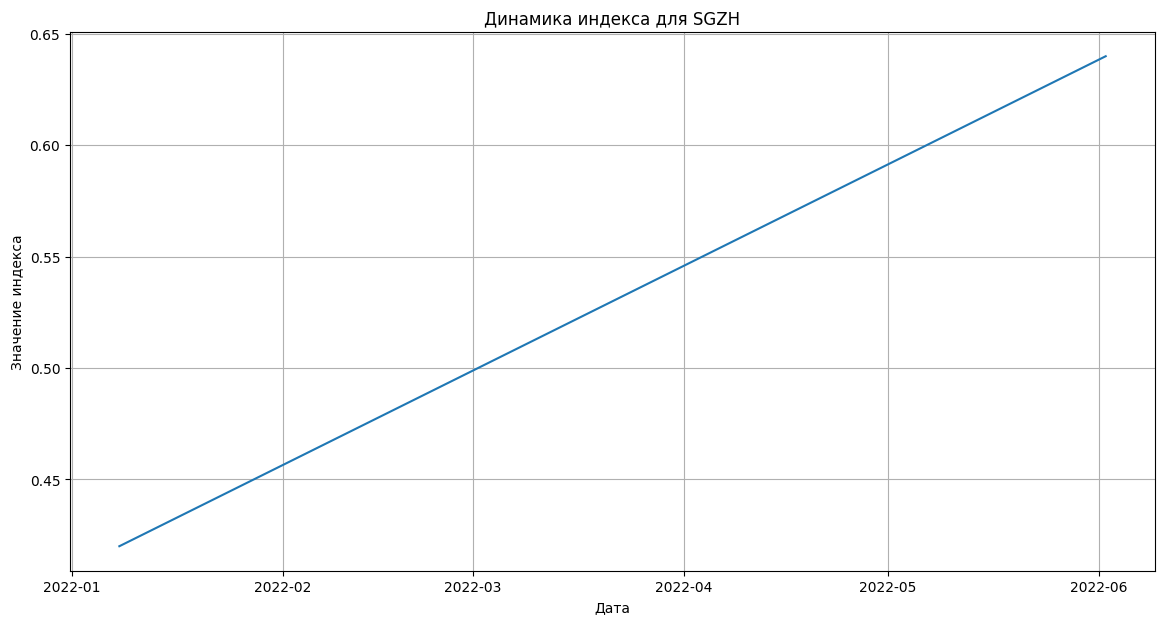

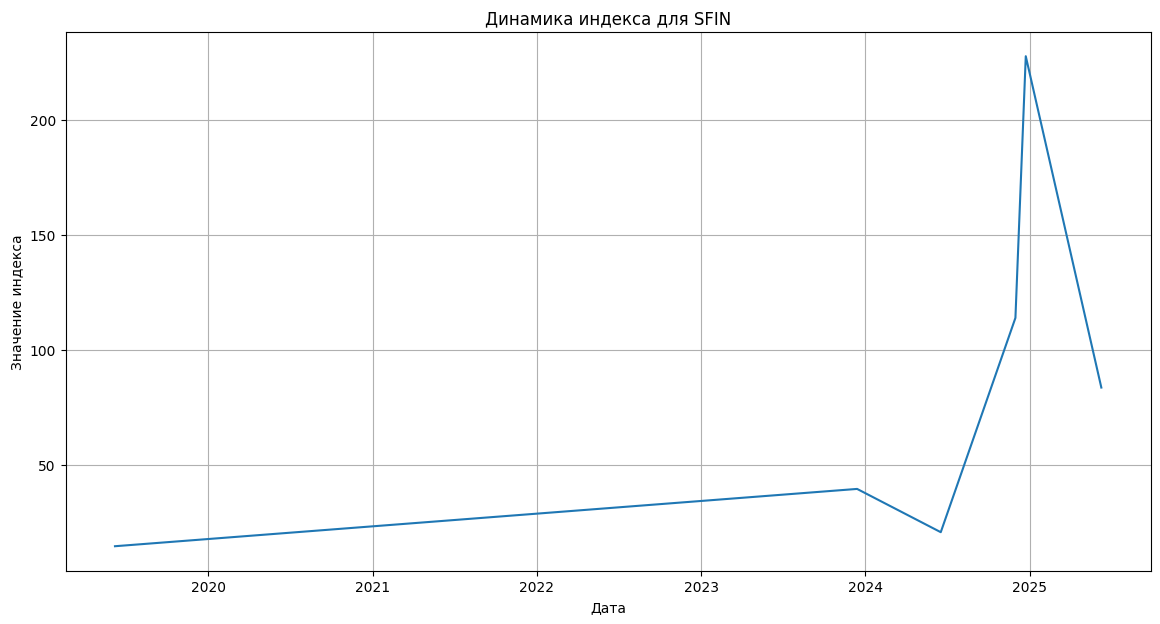

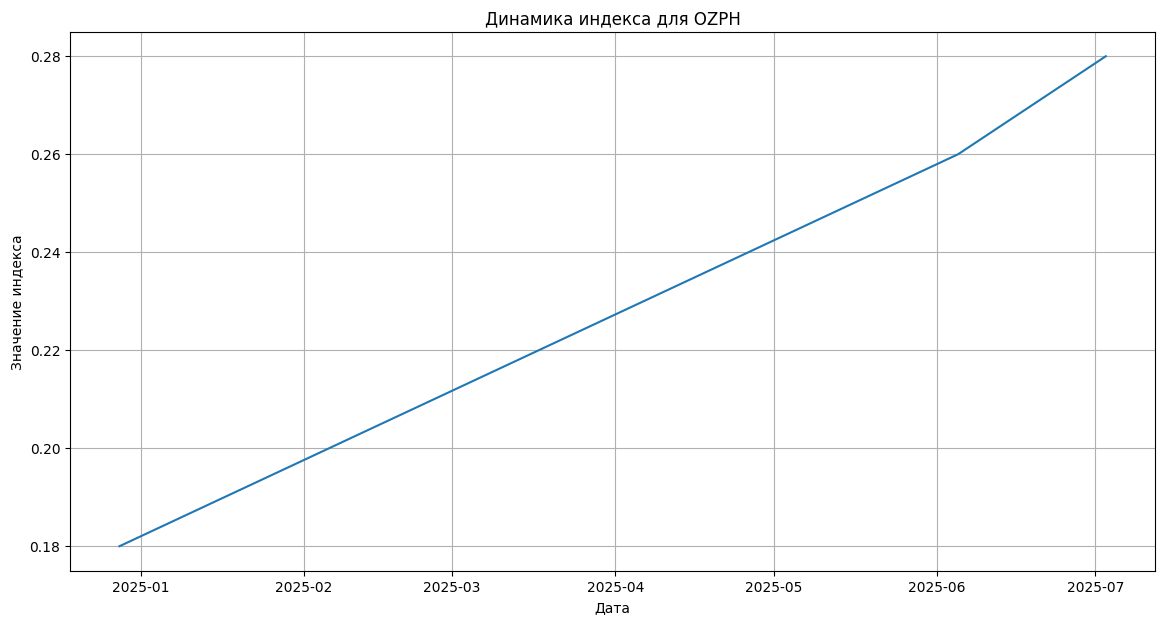

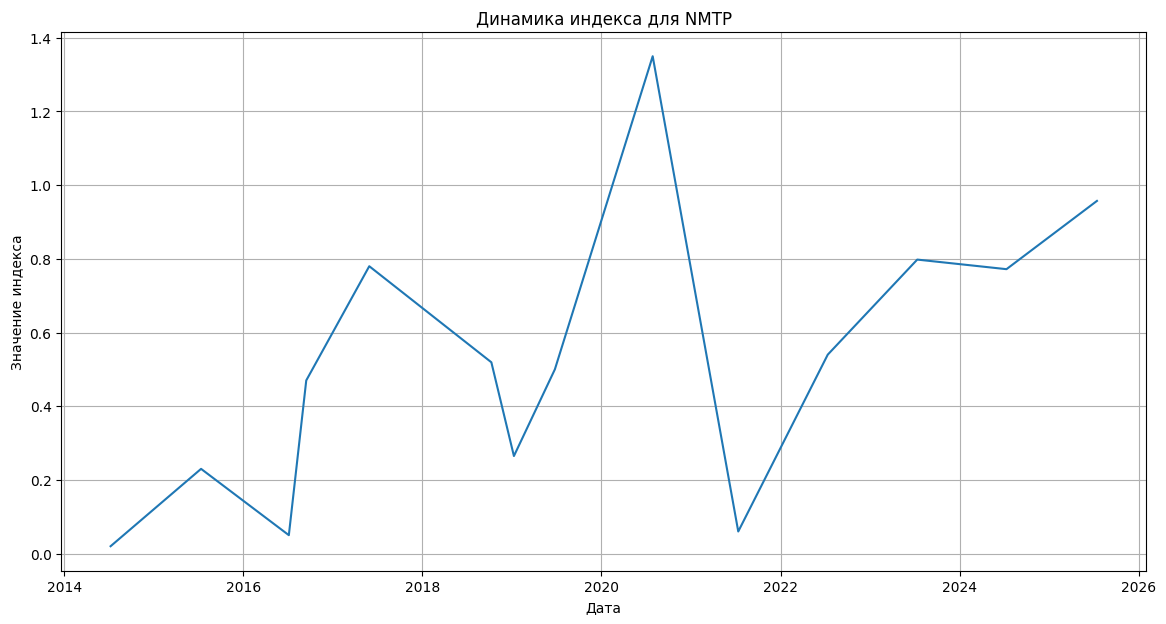

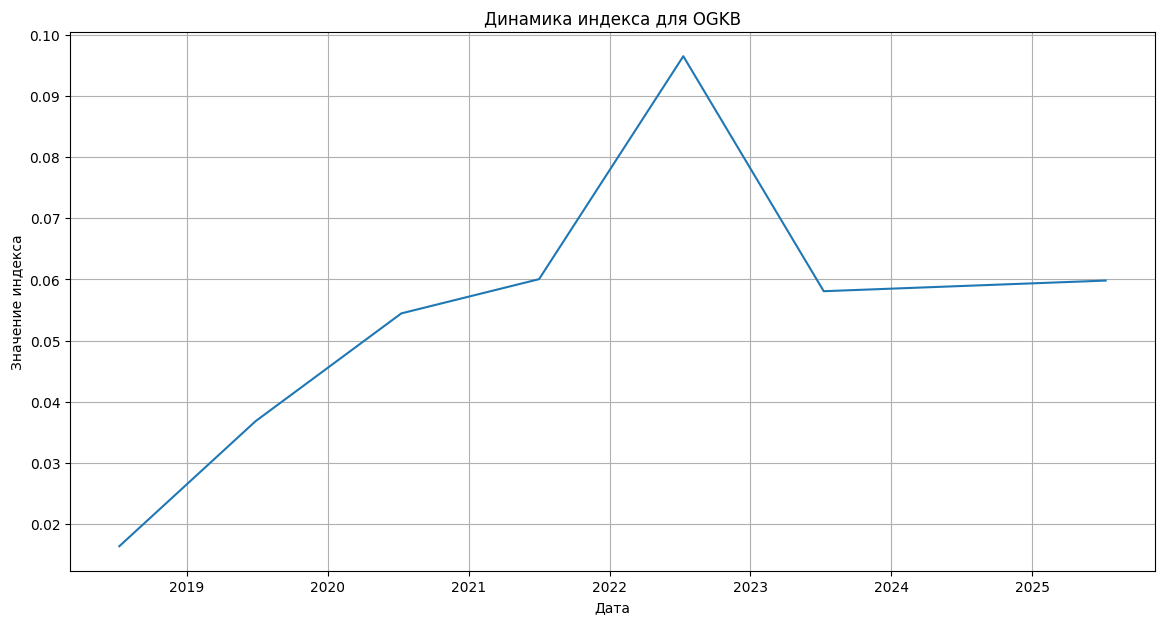

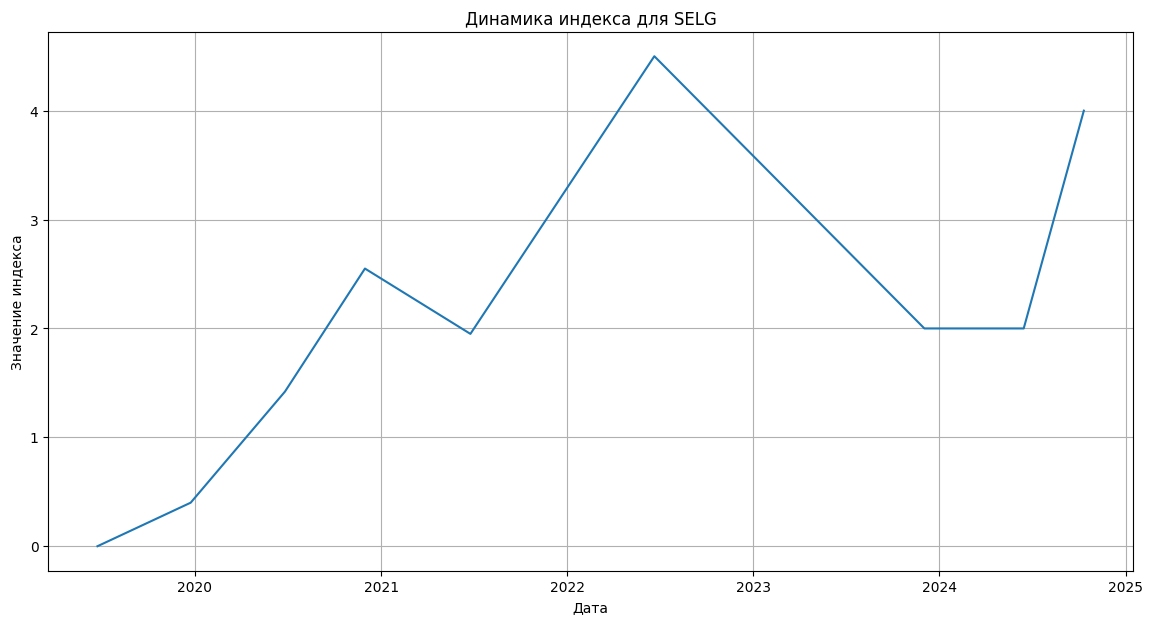

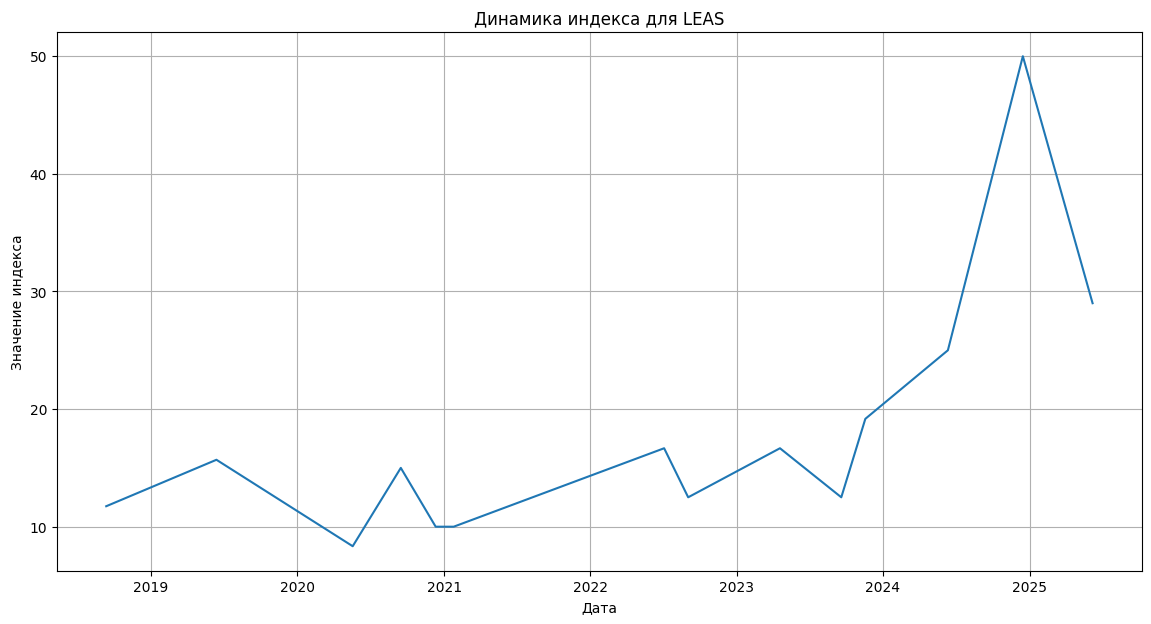

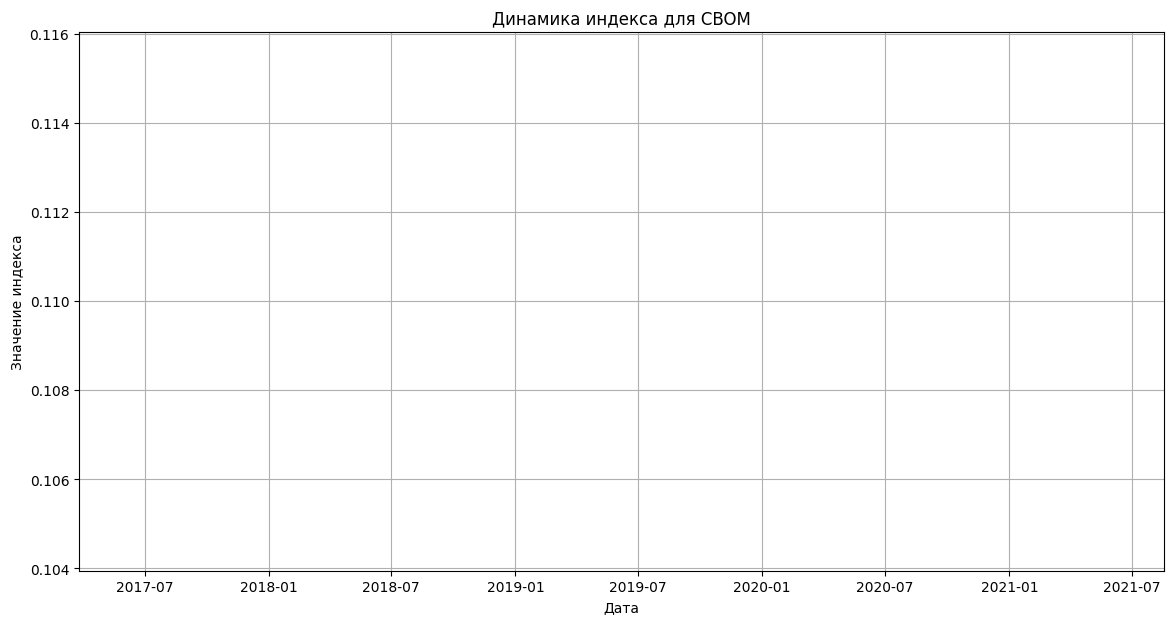

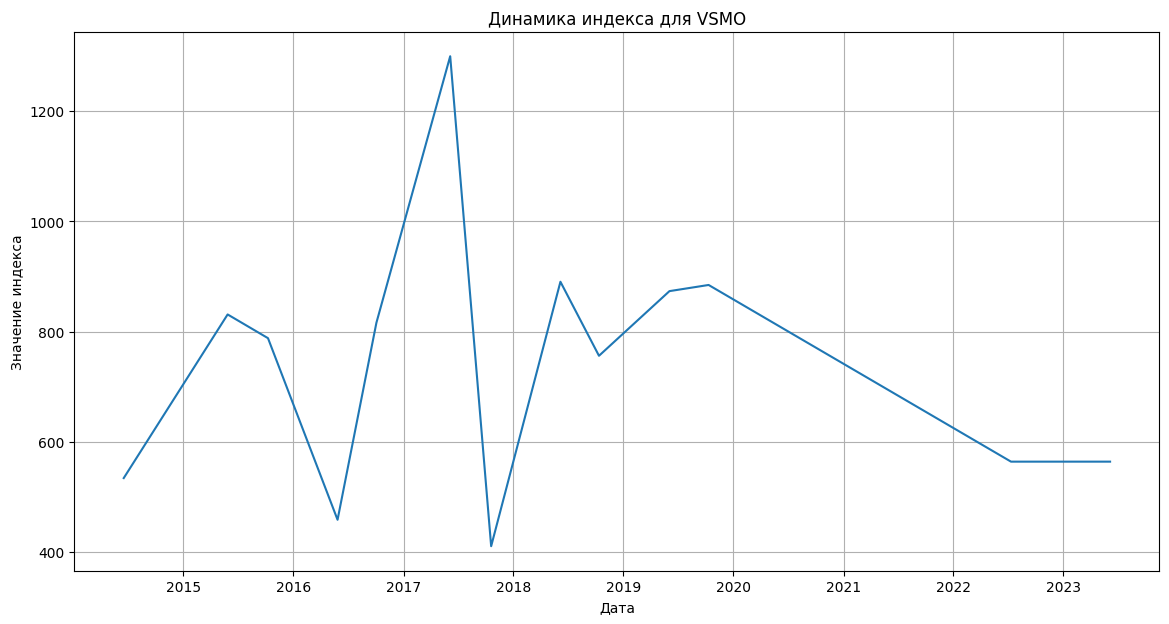

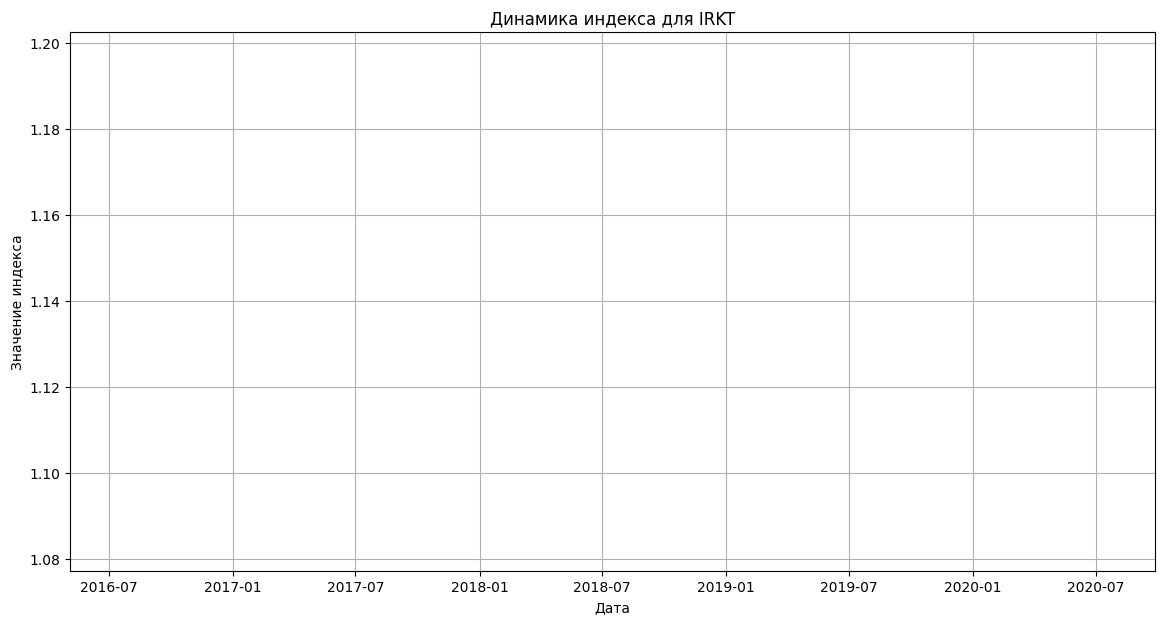

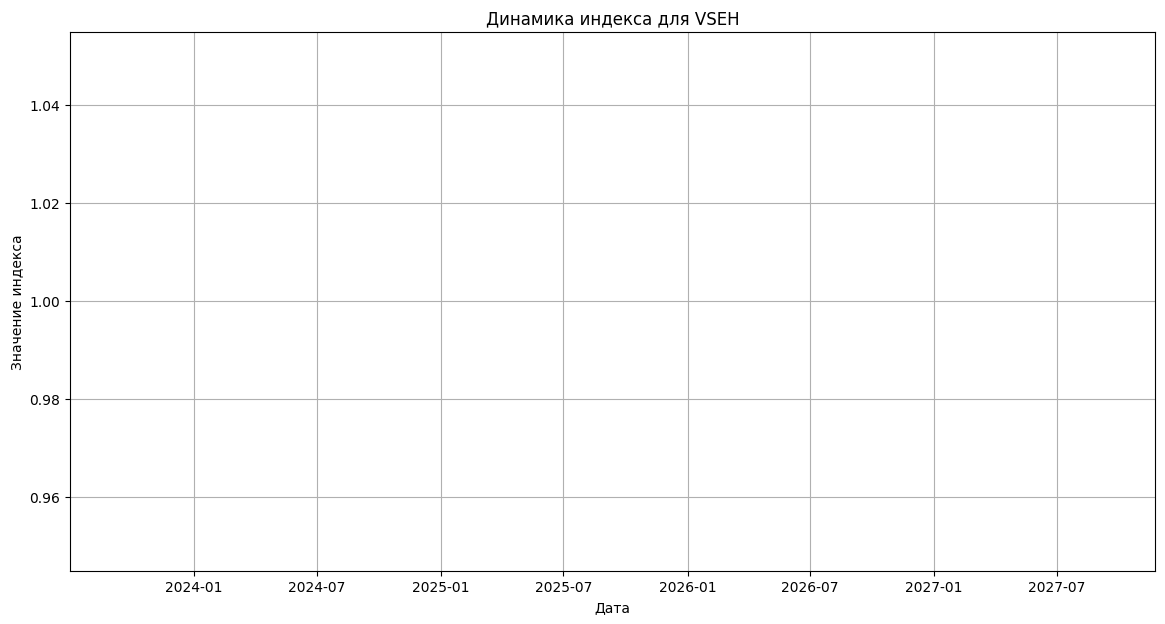

In [67]:
for code in df_dividends['ticker'].unique():
    subset = df_dividends[(df_dividends['ticker'] == code)]
    plt.figure(figsize=(14, 7))
    plt.plot(subset['date'], subset['dividedends_rub_per_share'])
    plt.title(f'Динамика индекса для {code}')
    plt.xlabel('Дата')
    plt.ylabel('Значение индекса')
    plt.grid(True)
    plt.show()

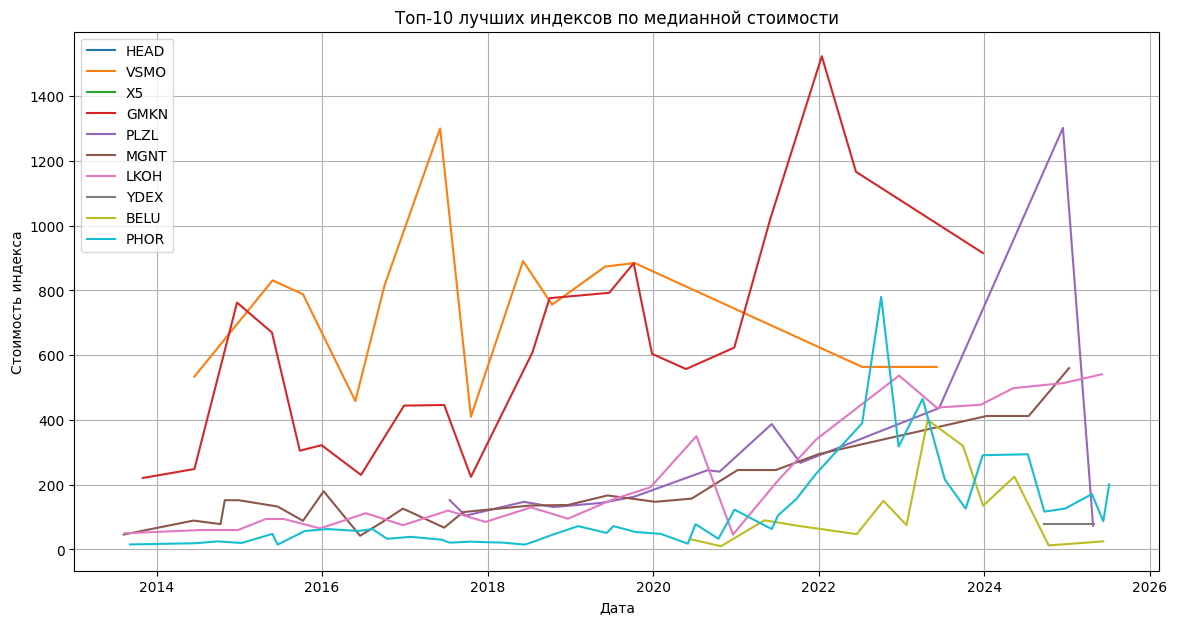

In [70]:
median_values = df_dividends.groupby('ticker')['dividedends_rub_per_share'].median()

top_10_best = median_values.nlargest(10).index

plt.figure(figsize=(14,7))
for code in top_10_best:
    subset = df_dividends[df_dividends['ticker'] == code]
    plt.plot(subset['date'], subset['dividedends_rub_per_share'], label=code)
plt.title('Топ-10 лучших индексов по медианной стоимости')
plt.xlabel('Дата')
plt.ylabel('Стоимость индекса')
plt.legend()
plt.grid(True)
plt.show()
